# Figure 1

In [1]:
import os
from pathlib import Path
import pickle

import scanpy as sc
import anndata

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotnine as p9

from tqdm.auto import tqdm
from sklearn.metrics import adjusted_rand_score

import scvelo as scv
from io import StringIO

In [2]:
sc.set_figure_params(dpi=100)
plt.rcParams['pdf.fonttype'] = 42
sc.settings.figdir = 'figures'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys

sys.path.append(str(Path.home() / 'Code/sctoolkit/')) # https://github.com/gokceneraslan/sctoolkit/

In [5]:
from sctoolkit.proportions import plot_proportion_barplot, plot_proportion_barplot_cellcounts, plot_proportion_barplot_single_categorical, plot_proportion_barplot_with_ncells, merge_ggplots, dirichletreg, get_proportions_per_channel
from sctoolkit.utils import plot_significance_dotplot
from sctoolkit.sctransform import sctransform

## Read data

In [ ]:
adata = sc.read('../atlas.h5ad')

## UMAP

## Figure 1B

In [8]:
ad = adata[adata.obs['Broad cell type']!= 'Unknown'].copy()

In [ ]:
sc.set_figure_params(vector_friendly=True)    
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Tissue composition', size=2, show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False, return_fig=True, title='Cellular compartment').savefig(sc.settings.figdir/'Figure-01-B1-umapcellgroups-tissuecomp-rasterized.pdf')
    #sc.pl.umap(ad, color='Tissue composition', size=2, show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False, return_fig=True).savefig(sc.settings.figdir/'Figure-01-B1-umapcellgroups-tissuecomp.png')

In [10]:
# from https://github.com/theislab/scanpy/issues/1513#issuecomment-735051689 Thanks to ivirshup

from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

In [ ]:
import matplotlib.patheffects as p

with plt.rc_context({"figure.figsize": (12, 12), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    ax = sc.pl.umap(ad, color="Broad cell type", show=False, legend_loc=None, frameon=False, add_outline=True, outline_width=(0.1,0.1), size=2)
    pe = [p.withStroke(linewidth=2, foreground='w')]
    gen_mpl_labels(
        ad,
        "Broad cell type",
        exclude=("None", 'Unknown'),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=8, path_effects=pe),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    plt.show()

In [ ]:
import matplotlib.patheffects as p

with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    ax = sc.pl.umap(ad, color="Broad cell type numbers", show=False, title='Broad cell types', 
                    legend_loc=None, frameon=False, add_outline=True, outline_width=(0.1,0.1), size=2)
    pe = [p.withStroke(linewidth=2, foreground='w')]
    gen_mpl_labels(
        ad,
        "Broad cell type numbers",
        exclude=("None", 'Unknown'),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=10, path_effects=pe),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    plt.show()

In [67]:
fig.savefig(sc.settings.figdir / 'Figure-01-B2-umap-broadcelltypes.pdf', dpi=300)

sc.set_figure_params(vector_friendly=False)
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Broad cell type numbers', size=2, title='Broad cell type', return_fig=True, show=False,
               add_outline=True, outline_width=(0.1,0.1), legend_loc='on data', legend_fontoutline=2, legend_fontsize=8, 
               legend_fontweight='normal', frameon=False).savefig(sc.settings.figdir/'Figure-01-B2-option2-umap-broadcelltypes.pdf')

sc.set_figure_params(vector_friendly=True)
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Broad cell type numbers', size=2, title='Broad cell type', return_fig=True, show=False,
               add_outline=True, outline_width=(0.1,0.1), legend_loc='on data', legend_fontoutline=2, legend_fontsize=8, 
               legend_fontweight='normal', frameon=False).savefig(sc.settings.figdir/'Figure-01-B2-option2-umap-broadcelltypes-rasterized.pdf')

    sc.pl.umap(ad, color='Broad cell type numbers', size=2, title='Broad cell type', return_fig=True, show=False,
               add_outline=True, outline_width=(0.1,0.1), legend_loc='on data', legend_fontoutline=2, legend_fontsize=8, 
               legend_fontweight='normal', frameon=False).savefig(sc.settings.figdir/'Figure-01-B2-option2-umap-broadcelltypes.png')

In [ ]:
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Broad cell type (numbers)', size=2, save='celltypes.pdf', title='Broad cell type', return_fig=True,
               show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-B2-umap-broadcelltypes-legend.pdf')

sc.set_figure_params(vector_friendly=True)
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Cell types level 3', size=2, return_fig=True, show=False, add_outline=True, title='Cell groups', 
               outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-ZZ-umap-cellgroups.pdf')

sc.set_figure_params(vector_friendly=False)
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Cell types level 3', size=2, return_fig=True, show=False, add_outline=True, title='Cell groups', 
               outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-ZZ-umap-cellgroups-rasterized.pdf')
    
    sc.pl.umap(ad, color='Cell types level 3', size=2, return_fig=True, show=False, add_outline=True, title='Cell groups',
               outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-ZZ-umap-cellgroups.png')

In [ ]:
#sc.set_figure_params(vector_friendly=False)
#with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
#    sc.pl.umap(ad, color='Tissue', size=2, return_fig=True, show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-B3-umaptissues.pdf')

with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color='Tissue', size=2, return_fig=True, show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-B3-umaptissues-rasterized.pdf')
#    sc.pl.umap(ad, color='Tissue', size=2, return_fig=True, show=False, add_outline=True, outline_width=(0.1,0.1), frameon=False).savefig(sc.settings.figdir/'Figure-01-B3-umaptissues.png')

In [ ]:
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color=['prep'], show=False, size=2, return_fig=True, frameon=False, wspace=1.0).savefig(sc.settings.figdir/'Figure-01-B4-umap-prep-rasterized.pdf')

In [ ]:
with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad, color=['Participant ID'], show=False, size=2, return_fig=True, frameon=False, wspace=1.0).savefig(sc.settings.figdir/'Figure-01-B5-umap-participant-rasterized.pdf')

In [73]:
ad.obs.Age = ad.obs.Age.astype(int)
ad.obs['Sample Ischemic Time (mins)'] = ad.obs['Sample Ischemic Time (mins)'].astype(int)

In [ ]:
#sc.set_figure_params(vector_friendly=False)
#with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
#    sc.pl.umap(ad[idx], color=['Sex', 'Age', 'Sample Ischemic Time (mins)', 'BMI', 'Race/Ethnicity'], show=False, ncols=2, size=2,
#               return_fig=True, frameon=False, sort_order=False).savefig(sc.settings.figdir/'Figure-S01-A-umapcovariates.pdf')

with plt.rc_context({"figure.figsize": (10, 10), "figure.dpi": 300, "figure.frameon": False, 'savefig.bbox': 'tight'}):
    sc.pl.umap(ad[idx], color=['Sex', 'Age', 'Sample Ischemic Time (mins)', 'BMI', 'Race/Ethnicity'], show=False, ncols=2, size=2,
               return_fig=True, frameon=False, sort_order=False).savefig(sc.settings.figdir/'Figure-S01-A-umapcovariates-rasterized.pdf')

## PAGA

In [75]:
ad = adata[adata.obs['Broad cell type']!='Unknown'].copy()
sc.pp.neighbors(ad, use_rep='X_vae_mean', n_neighbors=5)

In [76]:
ad.obs['tissue-ct'] = ad.obs.Tissue.astype(str) + '|' + ad.obs['Broad cell type'].astype(str)

In [77]:
sc.tl.paga(ad, groups='tissue-ct')

... storing 'tissue-ct' as categorical


In [78]:
col_dict = {k:v for k,v in zip(ad.obs['Broad cell type'].cat.categories, ad.uns['Broad cell type_colors'])}

In [79]:
ad.obs['tissue-ct'].cat.categories

Index(['Breast|Adipocyte', 'Breast|Endothelial cell (lymphatic)',
       'Breast|Endothelial cell (vascular)',
       'Breast|Epithelial cell (luminal)', 'Breast|Fibroblast',
       'Breast|Immune (DC/macrophage)', 'Breast|Myoepithelial (basal)',
       'Breast|Pericyte/SMC', 'Esophagus mucosa|Endothelial cell (lymphatic)',
       'Esophagus mucosa|Endothelial cell (vascular)',
       ...
       'Skin|Epithelial cell (suprabasal keratinocyte)', 'Skin|Fibroblast',
       'Skin|Immune (DC/macrophage)', 'Skin|Immune (Langerhans)',
       'Skin|Immune (T cell)', 'Skin|Immune (mast cell)', 'Skin|Melanocyte',
       'Skin|Pericyte/SMC', 'Skin|Sebaceous gland cell',
       'Skin|Sweat gland cell'],
      dtype='object', length=113)

In [80]:
ad.uns['tissue-ct_colors'] = [col_dict[x.split('|')[1]] for x in ad.obs['tissue-ct'].cat.categories]

In [ ]:
scv.pl.paga(ad, 
            figsize=(20,20),
            color='tissue',
            basis='umap',
            threshold=0.5,
            add_outline=True,
            outline_colors=['white', 'white'],
            outline_width=[0.01, 0.01],
            edge_width_scale=0.1,
            max_edge_width=0.05,
            fontsize=8,
            fontweight='normal',
            legend_loc='right',
            frameon=True,            
            fontoutline=2,
            scatter_flag=True,
            size=2,
            alpha=0.3,
            title='Cell type similarities')

## Compositions

In [11]:
exclude_channels = adata.obs.channel.value_counts() < 30
exclude_channels = exclude_channels[exclude_channels].index
exclude_channels

CategoricalIndex(['skin_TST_GTEX-1CAMR', 'skin_TST_GTEX-15EOM',
                  'skin_CST_GTEX-1CAMR', 'skin_NST_GTEX-1CAMR',
                  'breast_EZ_GTEX-1R9PN'],
                 categories=['breast_CST_GTEX-1CAMS', 'breast_CST_GTEX-1MCC2', 'breast_CST_GTEX-1R9PN', 'breast_EZ_GTEX-1CAMS', 'breast_EZ_GTEX-1MCC2', 'breast_EZ_GTEX-1R9PN', 'breast_NST_GTEX-1CAMS', 'breast_NST_GTEX-1MCC2', ...], ordered=False, dtype='category')

In [12]:
adata._sanitize()

In [13]:
adata

AnnData object with n_obs × n_vars = 209126 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Container', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', '

In [14]:
ad = adata[(~adata.obs.channel.isin(exclude_channels)) & (adata.obs['Broad cell type'] != 'Unknown')].copy()
ad

AnnData object with n_obs × n_vars = 208626 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Container', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', '

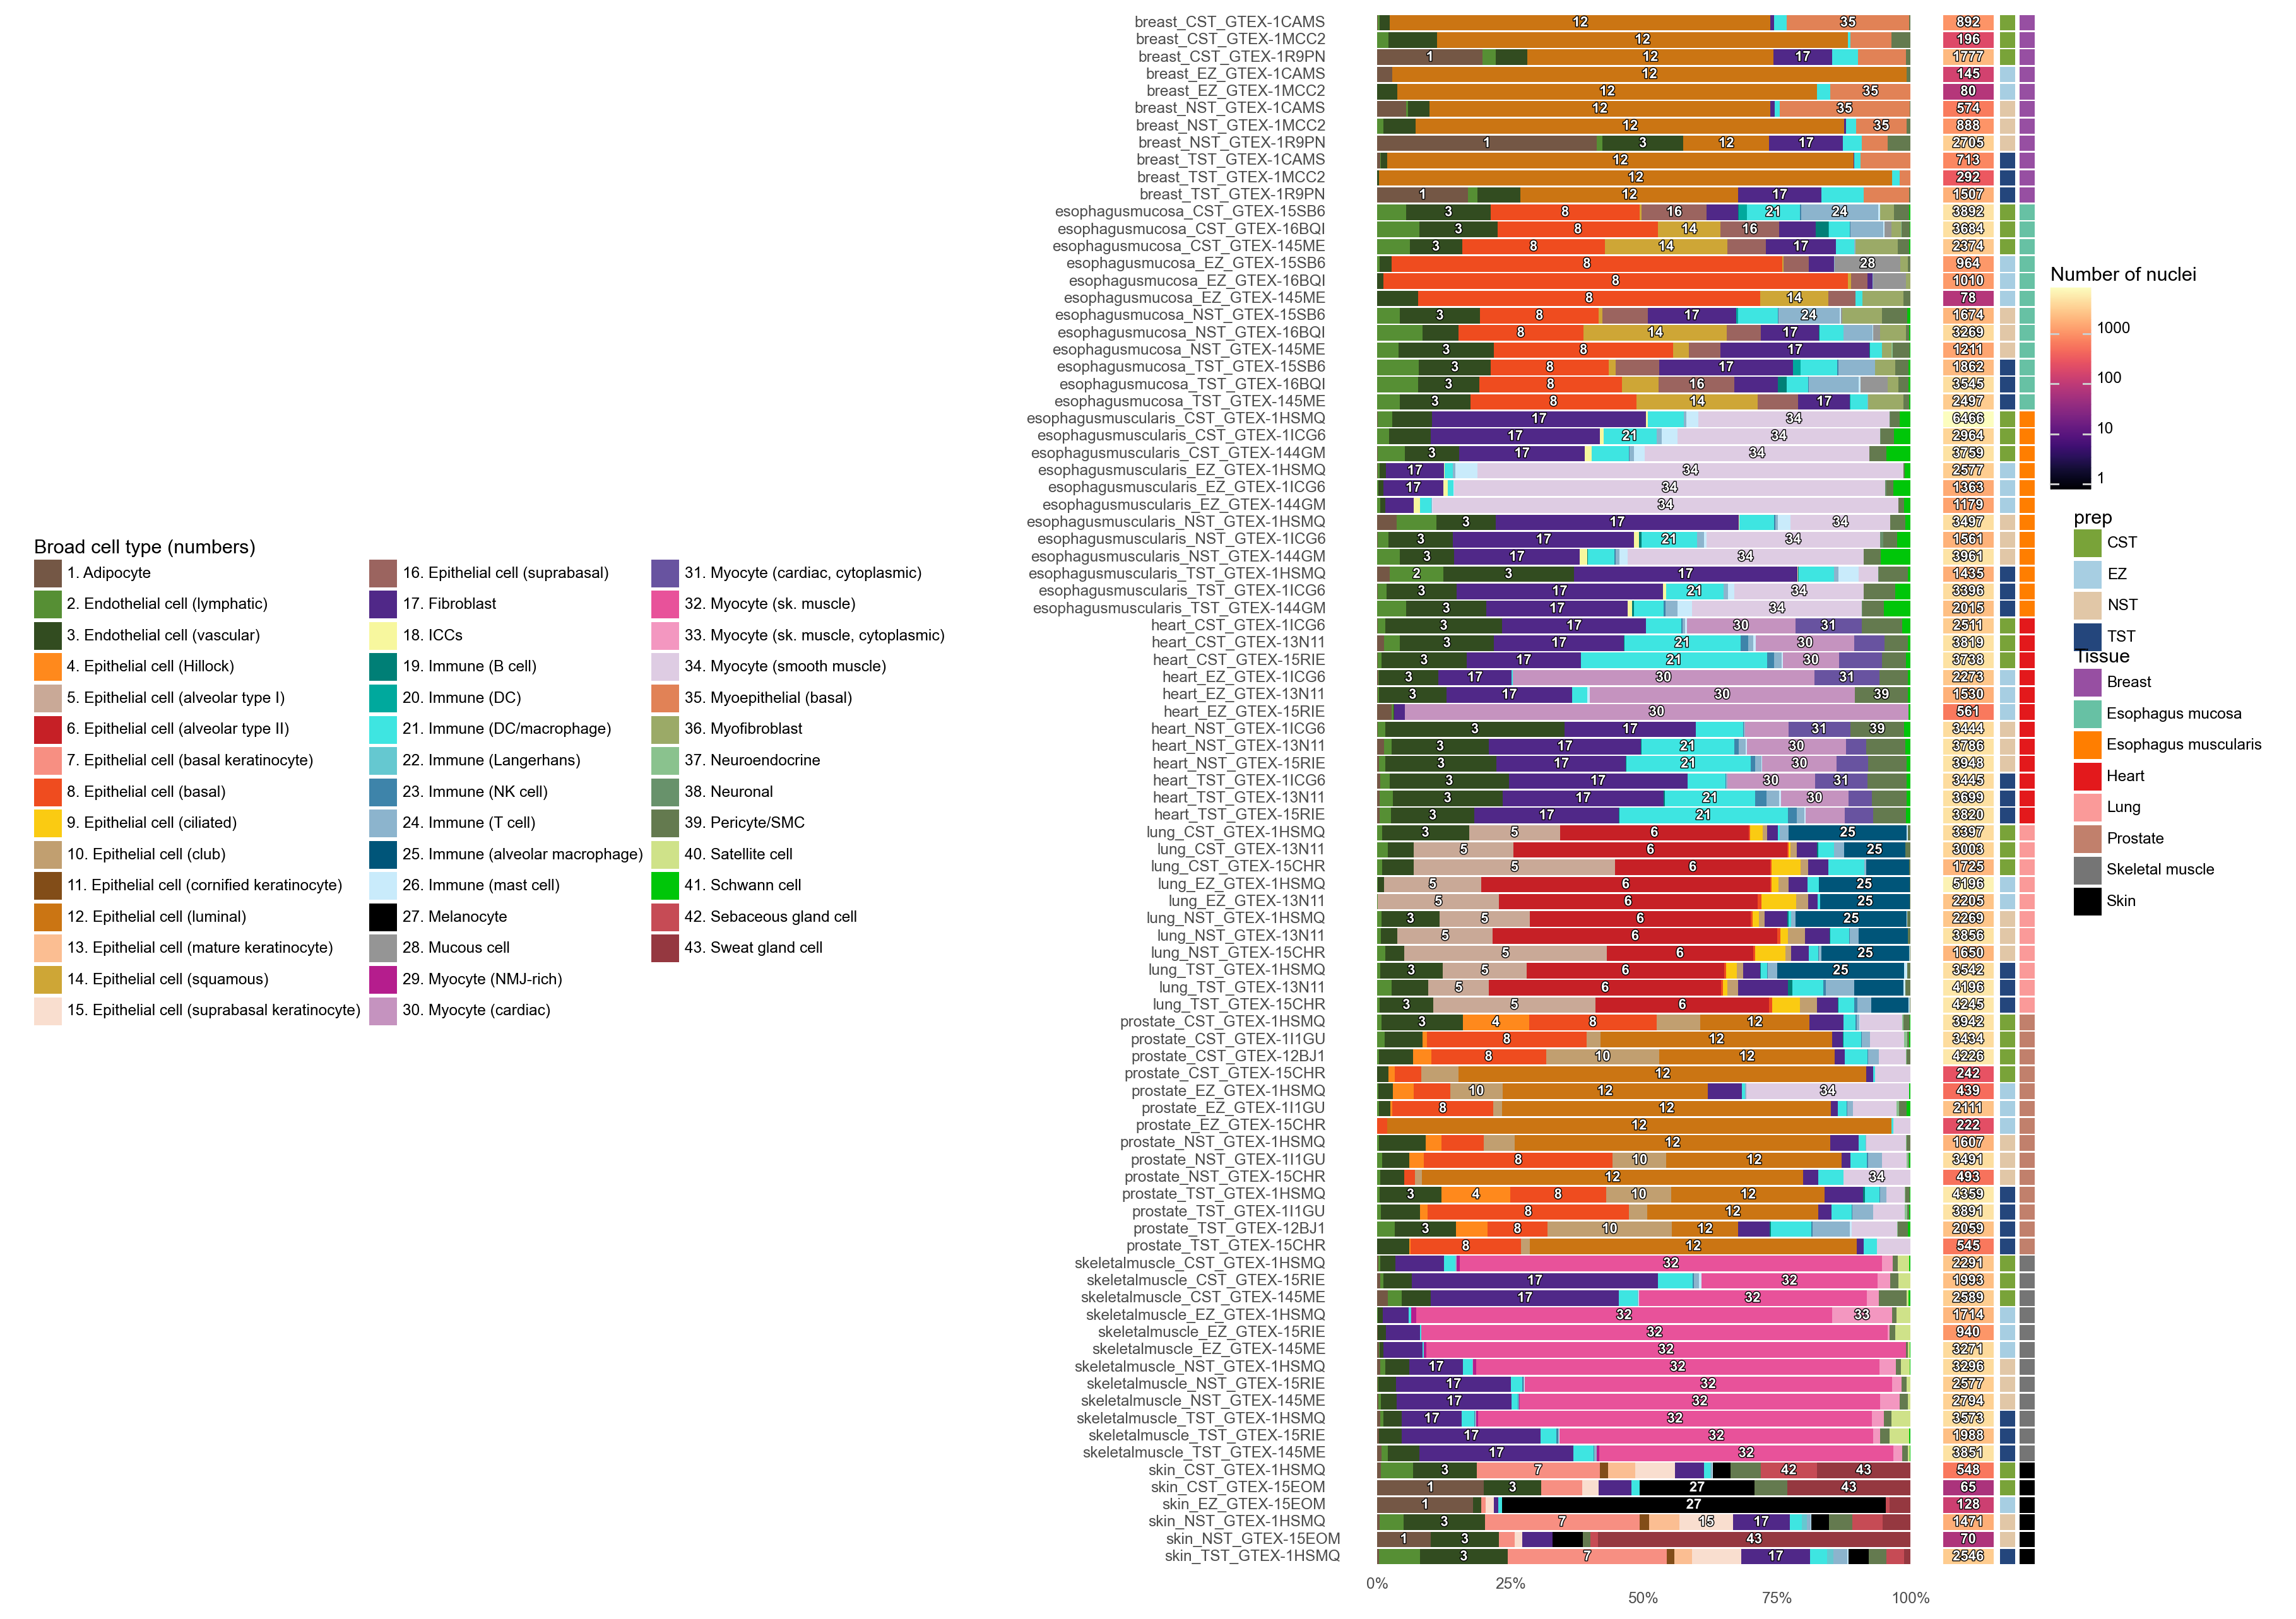

In [15]:
f1 = plot_proportion_barplot(ad, 'channel', 'Broad cell type (numbers)', legend_position=(-0.85,0.5), height_scale=0.8, percent_limit=10, external_percent_label='Broad cell type numbers')
f2 = plot_proportion_barplot_cellcounts(ad, 'channel', legend_position=(1,0.7), count_label='Number of nuclei')
f3 = plot_proportion_barplot_single_categorical(ad, 'channel', 'prep', legend_position=(0.98,0.6))
f4 = plot_proportion_barplot_single_categorical(ad, 'channel', 'Tissue', legend_position=(1.05,0.5))

f = merge_ggplots(f1, f2, f3, f4, units=[30, 3, 1, 1], figsize=(7,16))
f.savefig( sc.settings.figdir / 'Figure-S01-B-channel-celltype-compositions.pdf', bbox_inches = "tight")

In [16]:
orig_cats = ad.obs['Broad cell type'].cat.categories.copy()

In [17]:
ad.obs['Broad cell type'].cat.reorder_categories([        
    'Adipocyte',
    'Endothelial cell (lymphatic)',
    'Endothelial cell (vascular)', 
    'Epithelial cell (basal)',
    'Epithelial cell (club)',
    'Epithelial cell (luminal)',
    'Fibroblast',
    'ICCs',
    'Immune (B cell)',
    'Immune (DC/macrophage)', 
    'Immune (NK cell)',
    'Immune (T cell)',
    'Immune (mast cell)', 
    'Myocyte (smooth muscle)',
    'Neuroendocrine', 
    'Pericyte/SMC',
    'Schwann cell',
    
    'Epithelial cell (Hillock)',
    'Epithelial cell (alveolar type I)',
    'Epithelial cell (alveolar type II)',
    'Epithelial cell (basal keratinocyte)', 
    'Epithelial cell (ciliated)', 
    'Epithelial cell (cornified keratinocyte)', 
    'Epithelial cell (mature keratinocyte)', 
    'Epithelial cell (squamous)',
    'Epithelial cell (suprabasal keratinocyte)',
    'Epithelial cell (suprabasal)', 
    'Immune (DC)', 
    'Immune (Langerhans)',    
    'Immune (alveolar macrophage)',
    'Melanocyte',
    'Mucous cell',
    'Myocyte (NMJ-rich)',
    'Myocyte (cardiac)', 
    'Myocyte (cardiac, cytoplasmic)',
    'Myocyte (sk. muscle)', 
    'Myocyte (sk. muscle, cytoplasmic)',
    'Myoepithelial (basal)',
    'Myofibroblast',    
    'Neuronal', 
    'Satellite cell',    
    'Sebaceous gland cell',
    'Sweat gland cell',    
], inplace=True)

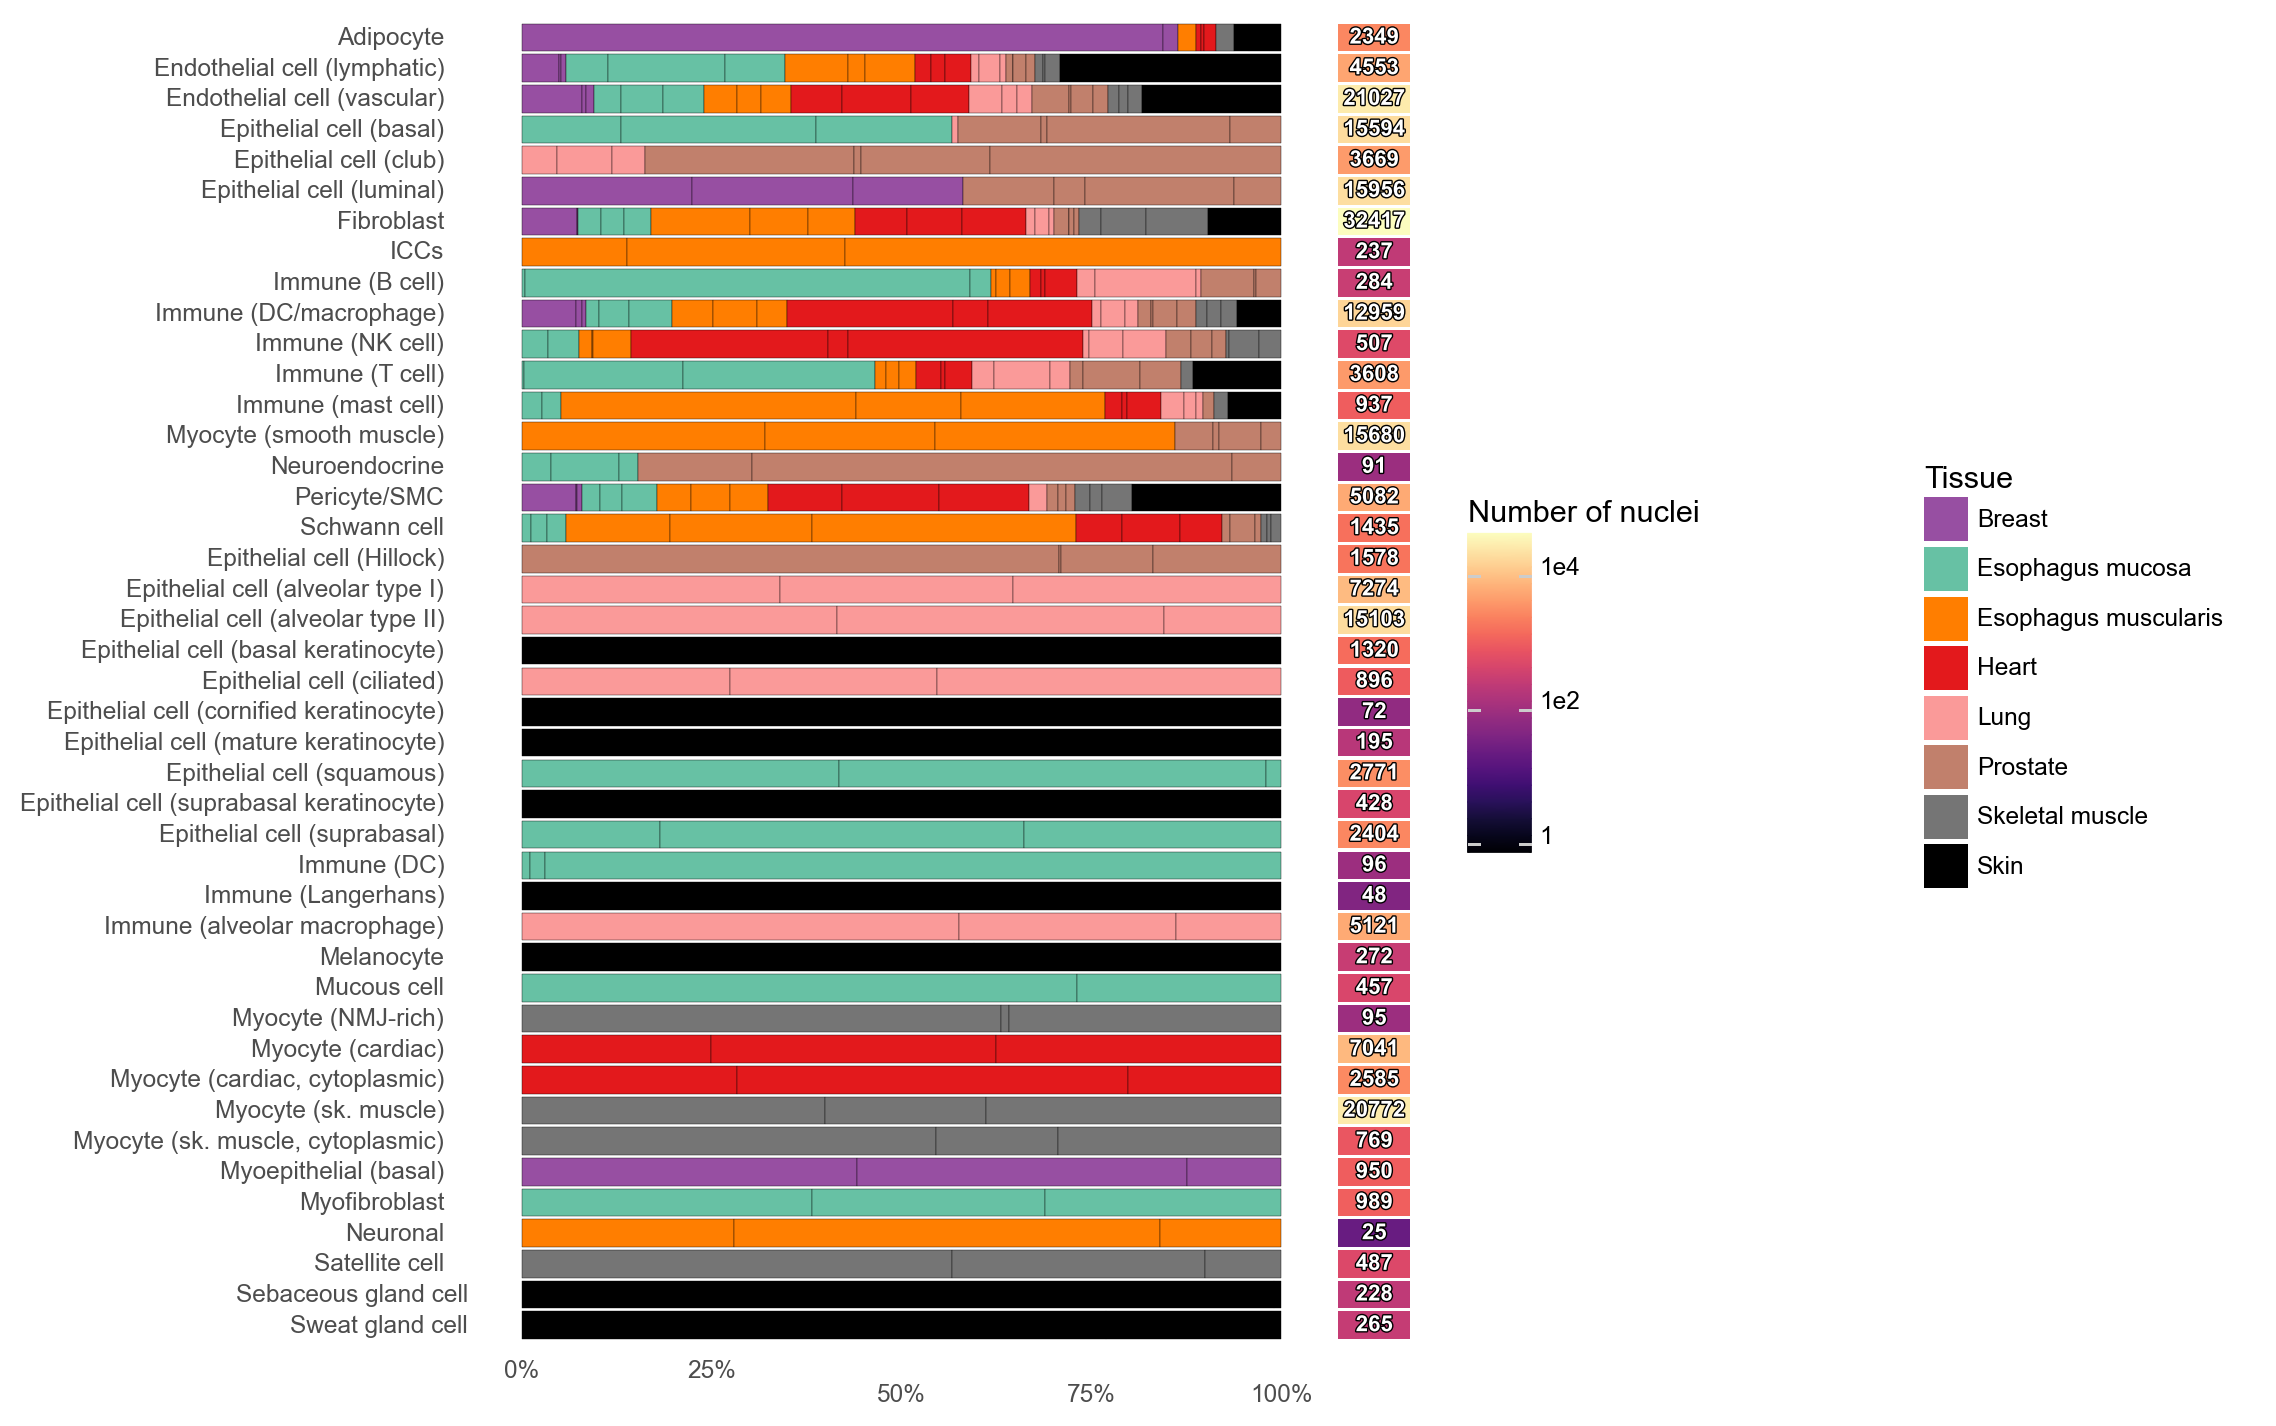

In [18]:
f = plot_proportion_barplot_with_ncells(ad, 'Broad cell type', 'Tissue', 'Participant ID', normalize_by='Tissue', percent_limit=3, height_scale=0.5, show_percent=False, width_scale=0.5, legend_position=(1.45, 0.5), count_label='Number of nuclei')
f.savefig( sc.settings.figdir / 'Figure-S01-D-celltype-tissue-compositions.pdf', bbox_inches = "tight")

In [19]:
from plotnine import *

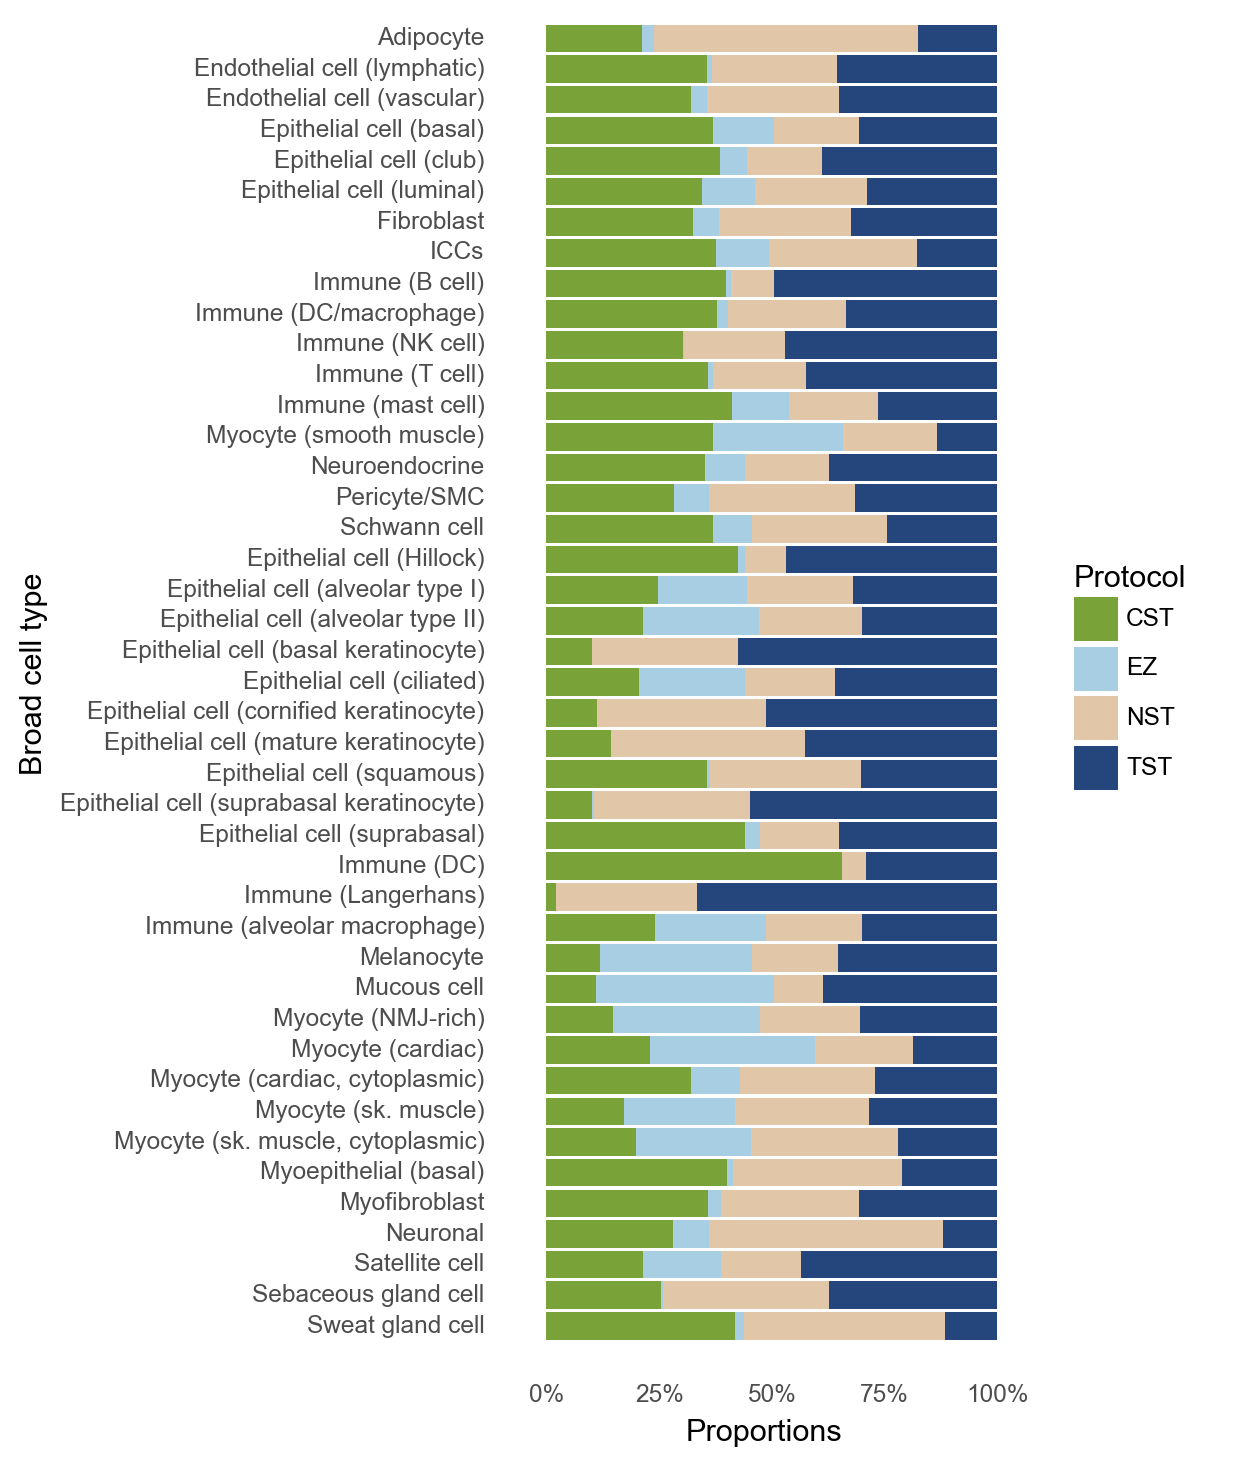

<ggplot: (8784488487165)>

In [20]:
f = plot_proportion_barplot(ad, 'Broad cell type', 'prep', percent_limit=3, height_scale=0.5, show_percent=False, width_scale=0.4, fill_label='Protocol')
ggsave(f, sc.settings.figdir / 'Figure-S01-D-celltype-prep-compositions.pdf', bbox_inches = "tight")
f

In [ ]:
del ad.uns['Participant ID_colors']

sc.pl.umap(ad, color='Participant ID')

In [32]:
adata.obs.Tissue.value_counts()

Heart                   36574
Lung                    35284
Esophagus muscularis    34173
Prostate                31061
Skeletal muscle         30877
Esophagus mucosa        26060
Breast                   9770
Skin                     5327
Name: Tissue, dtype: int64

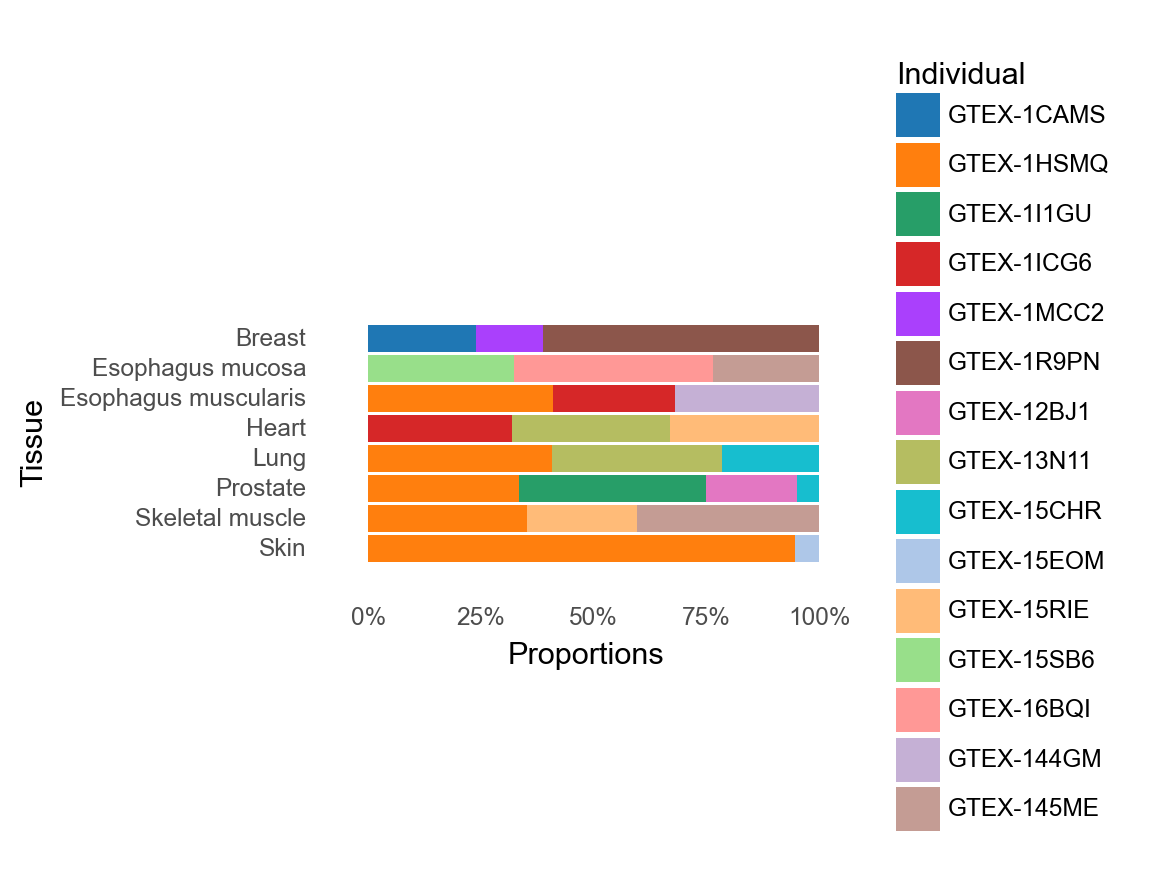

<ggplot: (8784328841159)>

In [25]:
f = plot_proportion_barplot(ad, 'Tissue', 'Participant ID', percent_limit=3, height_scale=0.5, show_percent=False, width_scale=0.4, fill_label='Individual')
#ggsave(f, sc.settings.figdir / 'Figure-S01-D-celltype-prep-compositions.pdf', bbox_inches = "tight")
f

In [27]:
pd.crosstab(adata.obs['Participant ID'], adata.obs.Tissue).T

Participant ID        GTEX-1CAMR  GTEX-1CAMS  GTEX-1HSMQ  GTEX-1I1GU  \
Tissue                                                                 
Breast                         0        2324           0           0   
Esophagus mucosa               0           0           0           0   
Esophagus muscularis           0           0       13975           0   
Heart                          0           0           0           0   
Lung                           0           0       14404           0   
Prostate                       0           0       10347       12927   
Skeletal muscle                0           0       10874           0   
Skin                          40           0        4961           0   

Participant ID        GTEX-1ICG6  GTEX-1MCC2  GTEX-1R9PN  GTEX-12BJ1  \
Tissue                                                                 
Breast                         0        1456        5990           0   
Esophagus mucosa               0           0           0           0   
Esophagus muscularis        9284           0           0           0   
Heart                      11673           0           0           0   
Lung                           0           0           0           0   
Prostate                       0           0           0        6285   
Skeletal muscle                0           0           0           0   
Skin                           0           0           0           0   

Participant ID        GTEX-13N11  GTEX-15CHR  GTEX-15EOM  GTEX-15RIE  \
Tissue                                                                 
Breast                         0           0           0           0   
Esophagus mucosa               0           0           0           0   
Esophagus muscularis           0           0           0           0   
Heart                      12834           0           0       12067   
Lung                       13260        7620           0           0   
Prostate                       0        1502           0           0   
Skeletal muscle                0           0           0        7498   
Skin                           0           0         326           0   

Participant ID        GTEX-15SB6  GTEX-16BQI  GTEX-144GM  GTEX-145ME  
Tissue                                                                
Breast                         0           0           0           0  
Esophagus mucosa            8392       11508           0        6160  
Esophagus muscularis           0           0       10914           0  
Heart                          0           0           0           0  
Lung                           0           0           0           0  
Prostate                       0           0           0           0  
Skeletal muscle                0           0           0       12505  
Skin                           0           0           0           0

In [30]:
pd.crosstab(adata.obs['Participant ID'], adata.obs.Tissue, normalize=1).T*100

Participant ID        GTEX-1CAMR  GTEX-1CAMS  GTEX-1HSMQ  GTEX-1I1GU  \
Tissue                                                                 
Breast                  0.000000   23.787103    0.000000    0.000000   
Esophagus mucosa        0.000000    0.000000    0.000000    0.000000   
Esophagus muscularis    0.000000    0.000000   40.894859    0.000000   
Heart                   0.000000    0.000000    0.000000    0.000000   
Lung                    0.000000    0.000000   40.823036    0.000000   
Prostate                0.000000    0.000000   33.311870   41.618106   
Skeletal muscle         0.000000    0.000000   35.217152    0.000000   
Skin                    0.750892    0.000000   93.129341    0.000000   

Participant ID        GTEX-1ICG6  GTEX-1MCC2  GTEX-1R9PN  GTEX-12BJ1  \
Tissue                                                                 
Breast                  0.000000   14.902764   61.310133    0.000000   
Esophagus mucosa        0.000000    0.000000    0.000000    0.000000   
Esophagus muscularis   27.167647    0.000000    0.000000    0.000000   
Heart                  31.916115    0.000000    0.000000    0.000000   
Lung                    0.000000    0.000000    0.000000    0.000000   
Prostate                0.000000    0.000000    0.000000   20.234378   
Skeletal muscle         0.000000    0.000000    0.000000    0.000000   
Skin                    0.000000    0.000000    0.000000    0.000000   

Participant ID        GTEX-13N11  GTEX-15CHR  GTEX-15EOM  GTEX-15RIE  \
Tissue                                                                 
Breast                  0.000000    0.000000    0.000000    0.000000   
Esophagus mucosa        0.000000    0.000000    0.000000    0.000000   
Esophagus muscularis    0.000000    0.000000    0.000000    0.000000   
Heart                  35.090501    0.000000    0.000000   32.993383   
Lung                   37.580773   21.596191    0.000000    0.000000   
Prostate                0.000000    4.835646    0.000000    0.000000   
Skeletal muscle         0.000000    0.000000    0.000000   24.283447   
Skin                    0.000000    0.000000    6.119767    0.000000   

Participant ID        GTEX-15SB6  GTEX-16BQI  GTEX-144GM  GTEX-145ME  
Tissue                                                                
Breast                  0.000000    0.000000    0.000000    0.000000  
Esophagus mucosa       32.202609   44.159632    0.000000   23.637759  
Esophagus muscularis    0.000000    0.000000   31.937495    0.000000  
Heart                   0.000000    0.000000    0.000000    0.000000  
Lung                    0.000000    0.000000    0.000000    0.000000  
Prostate                0.000000    0.000000    0.000000    0.000000  
Skeletal muscle         0.000000    0.000000    0.000000   40.499401  
Skin                    0.000000    0.000000    0.000000    0.000000

In [32]:
ad.obs['Broad cell type'].cat.reorder_categories(orig_cats, inplace=True)

In [33]:
#f = plot_proportion_barplot_with_ncells(ad, 'Tissue', 'Broad cell type (numbers)', 'Participant ID', legend_position=(-0.3, 0.5), percent_limit=10, height_scale=0.5)
#f.savefig( sc.settings.figdir /  'Figure-01-C-tissue-celltype-compositions.pdf', bbox_inches = "tight")

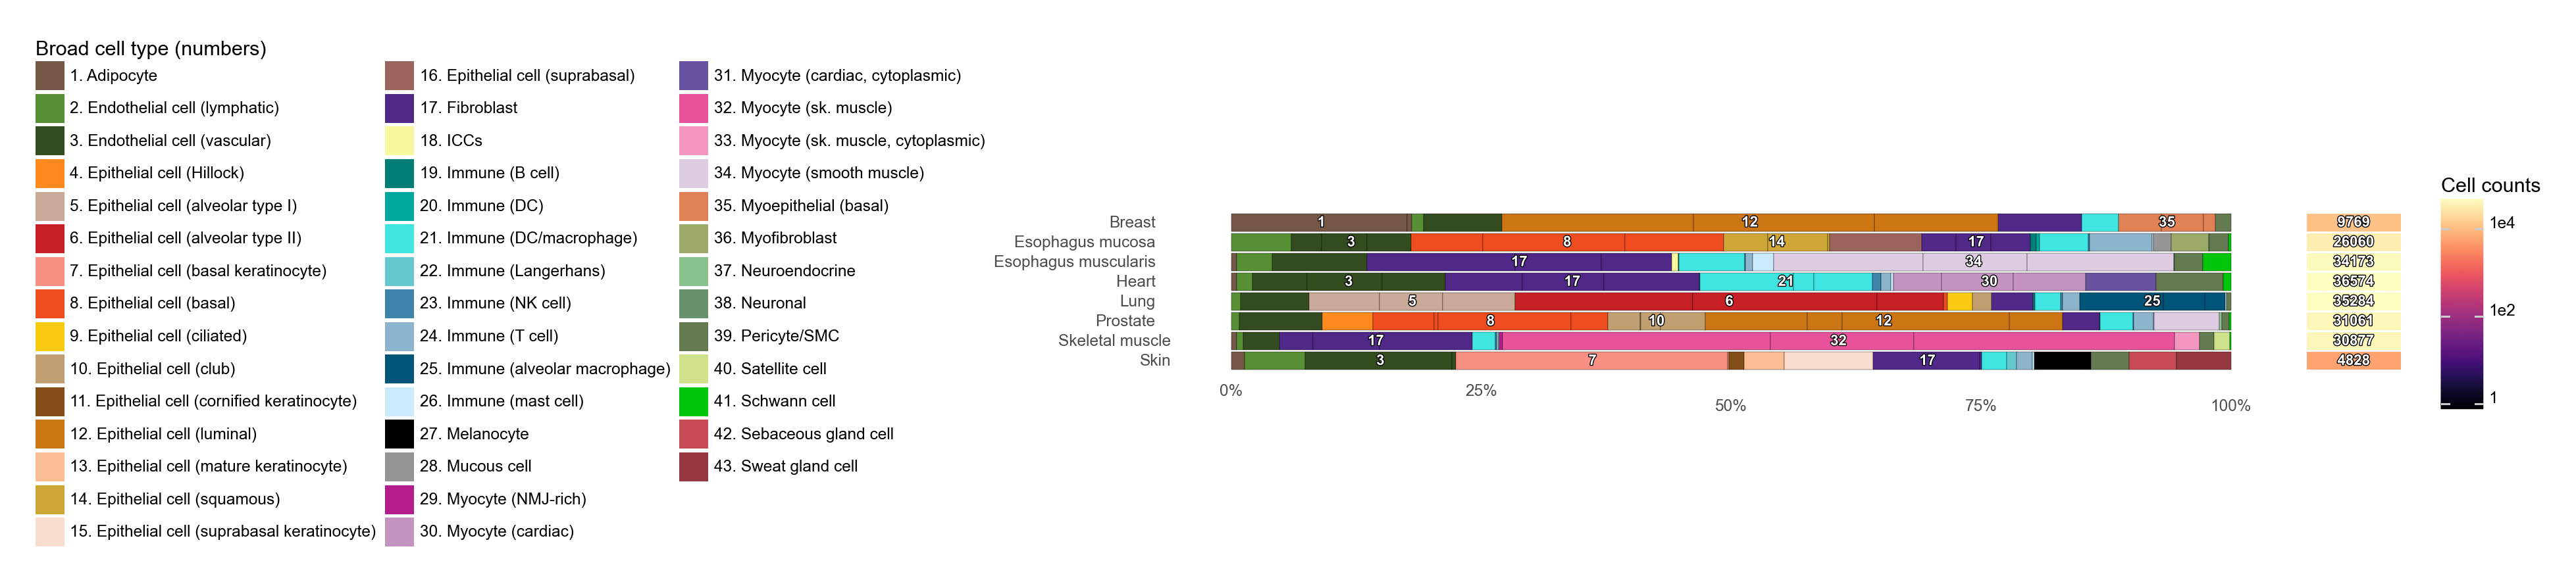

In [34]:
f = plot_proportion_barplot_with_ncells(ad, 'Tissue', 'Broad cell type (numbers)', 'Participant ID', legend_position=(-0.3, 0.5), percent_limit=10, external_percent_label='Broad cell type numbers', height_scale=0.5)
f.savefig( sc.settings.figdir /  'Figure-01-C-tissue-celltype-compositions.pdf', bbox_inches = "tight")

## Proportion models

In [38]:
adata.obs.columns

Index(['n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs',
       'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID',
       'Participant ID', 'Container', 'Sample ID short',
       'RIN score from PAXgene tissue Aliquot',
       'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity',
       'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail',
       'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts',
       'tissue-individual-prep', 'Broad cell type', 'Granular cell type',
       'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense',
       'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio',
       'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue',
       'Tissue composition', 'Cell types level 2', 'Cell types level 3',
       'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue',
       'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'],
      dtype='object')

In [39]:
adata.obs['tissue'].cat.categories

Index(['breast', 'esophagusmucosa', 'esophagusmuscularis', 'heart', 'lung',
       'prostate', 'skeletalmuscle', 'skin'],
      dtype='object')

In [40]:
adata.obs['ischemic_time'] = adata.obs['Sample Ischemic Time (mins)']
adata.obs['Participant_ID'] = adata.obs['Participant ID']
adata.obs['Sample_ID'] = adata.obs['Sample ID']

ref_tissue = 'Lung'
adata.obs['Tissue'].cat.reorder_categories([ref_tissue] + adata.obs.Tissue.cat.categories.drop(ref_tissue).tolist(), inplace=True)

In [41]:
adata.obs.Age = adata.obs.Age.astype(int)
adata.obs.ischemic_time = adata.obs.ischemic_time.astype(int)

In [42]:
exclude_channels = adata.obs.channel.value_counts() < 30
exclude_channels = exclude_channels[exclude_channels].index
exclude_channels

CategoricalIndex(['skin_TST_GTEX-1CAMR', 'skin_TST_GTEX-15EOM',
                  'skin_CST_GTEX-1CAMR', 'skin_NST_GTEX-1CAMR',
                  'breast_EZ_GTEX-1R9PN'],
                 categories=['breast_CST_GTEX-1CAMS', 'breast_CST_GTEX-1MCC2', 'breast_CST_GTEX-1R9PN', 'breast_EZ_GTEX-1CAMS', 'breast_EZ_GTEX-1MCC2', 'breast_EZ_GTEX-1R9PN', 'breast_NST_GTEX-1CAMS', 'breast_NST_GTEX-1MCC2', ...], ordered=False, dtype='category')

In [43]:
adata._sanitize()

In [44]:
ad = adata[(~adata.obs.channel.isin(exclude_channels)) & (adata.obs['Broad cell type'] != 'Unknown')].copy()
ad

AnnData object with n_obs × n_vars = 208626 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Container', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', '

In [45]:
#df = [dirichletreg(adata, 'channel', 'Broad cell type', 
#                   ['Age','Sex', 'tissue', 'prep', 'BMI', 'ischemic_time', 'PercentMito'], 
#                    'y ~ Age + Sex + tissue + prep', onevsrest_category=x) for x in tqdm(adata.obs['Broad cell type'].cat.categories)]
#df = pd.concat(df, axis=0)

In [46]:
df = dirichletreg(ad, 'channel', 'Broad cell type', ['Age','Sex', 'Tissue', 'prep', 'BMI', 'ischemic_time', 'PercentMito'], 'y ~ prep + Tissue')

In [47]:
df.variable.unique()

array(['(Intercept)', 'prepEZ', 'prepNST', 'prepTST', 'TissueBreast',
       'TissueEsophagus mucosa', 'TissueEsophagus muscularis',
       'TissueHeart', 'TissueProstate', 'TissueSkeletal muscle',
       'TissueSkin'], dtype=object)

In [48]:
df[df.variable!='(Intercept)']

coefficient        se      zval          pval       compartment  \
1      -0.307901  0.269146 -1.143992  2.526270e-01         Adipocyte   
2       0.083471  0.247532  0.337215  7.359549e-01         Adipocyte   
3       0.038155  0.248741  0.153393  8.780885e-01         Adipocyte   
4       0.711083  0.385411  1.844996  6.503814e-02         Adipocyte   
5      -0.278475  0.397776 -0.700081  4.838770e-01         Adipocyte   
..           ...       ...       ...           ...               ...   
468     0.087873  0.391911  0.224217  8.225886e-01  Sweat gland cell   
469    -0.109588  0.395625 -0.277000  7.817800e-01  Sweat gland cell   
470    -0.332517  0.383877 -0.866206  3.863772e-01  Sweat gland cell   
471     0.124857  0.391198  0.319166  7.496007e-01  Sweat gland cell   
472     2.330473  0.369442  6.308096  2.824891e-10  Sweat gland cell   

                       variable significance  
1                        prepEZ               
2                       prepNST               
3                       prepTST               
4                  TissueBreast            .  
5        TissueEsophagus mucosa               
..                          ...          ...  
468  TissueEsophagus muscularis               
469                 TissueHeart               
470              TissueProstate               
471       TissueSkeletal muscle               
472                  TissueSkin          ***  

[430 rows x 7 columns]

In [49]:
from statsmodels.stats.multitest import multipletests

In [50]:
s, p, _, _ = multipletests(df.pval, alpha=0.1, method='fdr_bh')
df['significant'] = s
df['pval_adj'] = p
df['neglog_pval_adj'] = -np.log10(p+1e-200)

In [51]:
df['variable_tissue'] = [x.split('Tissue')[1] if x.startswith('Tissue') else x for x in df.variable]

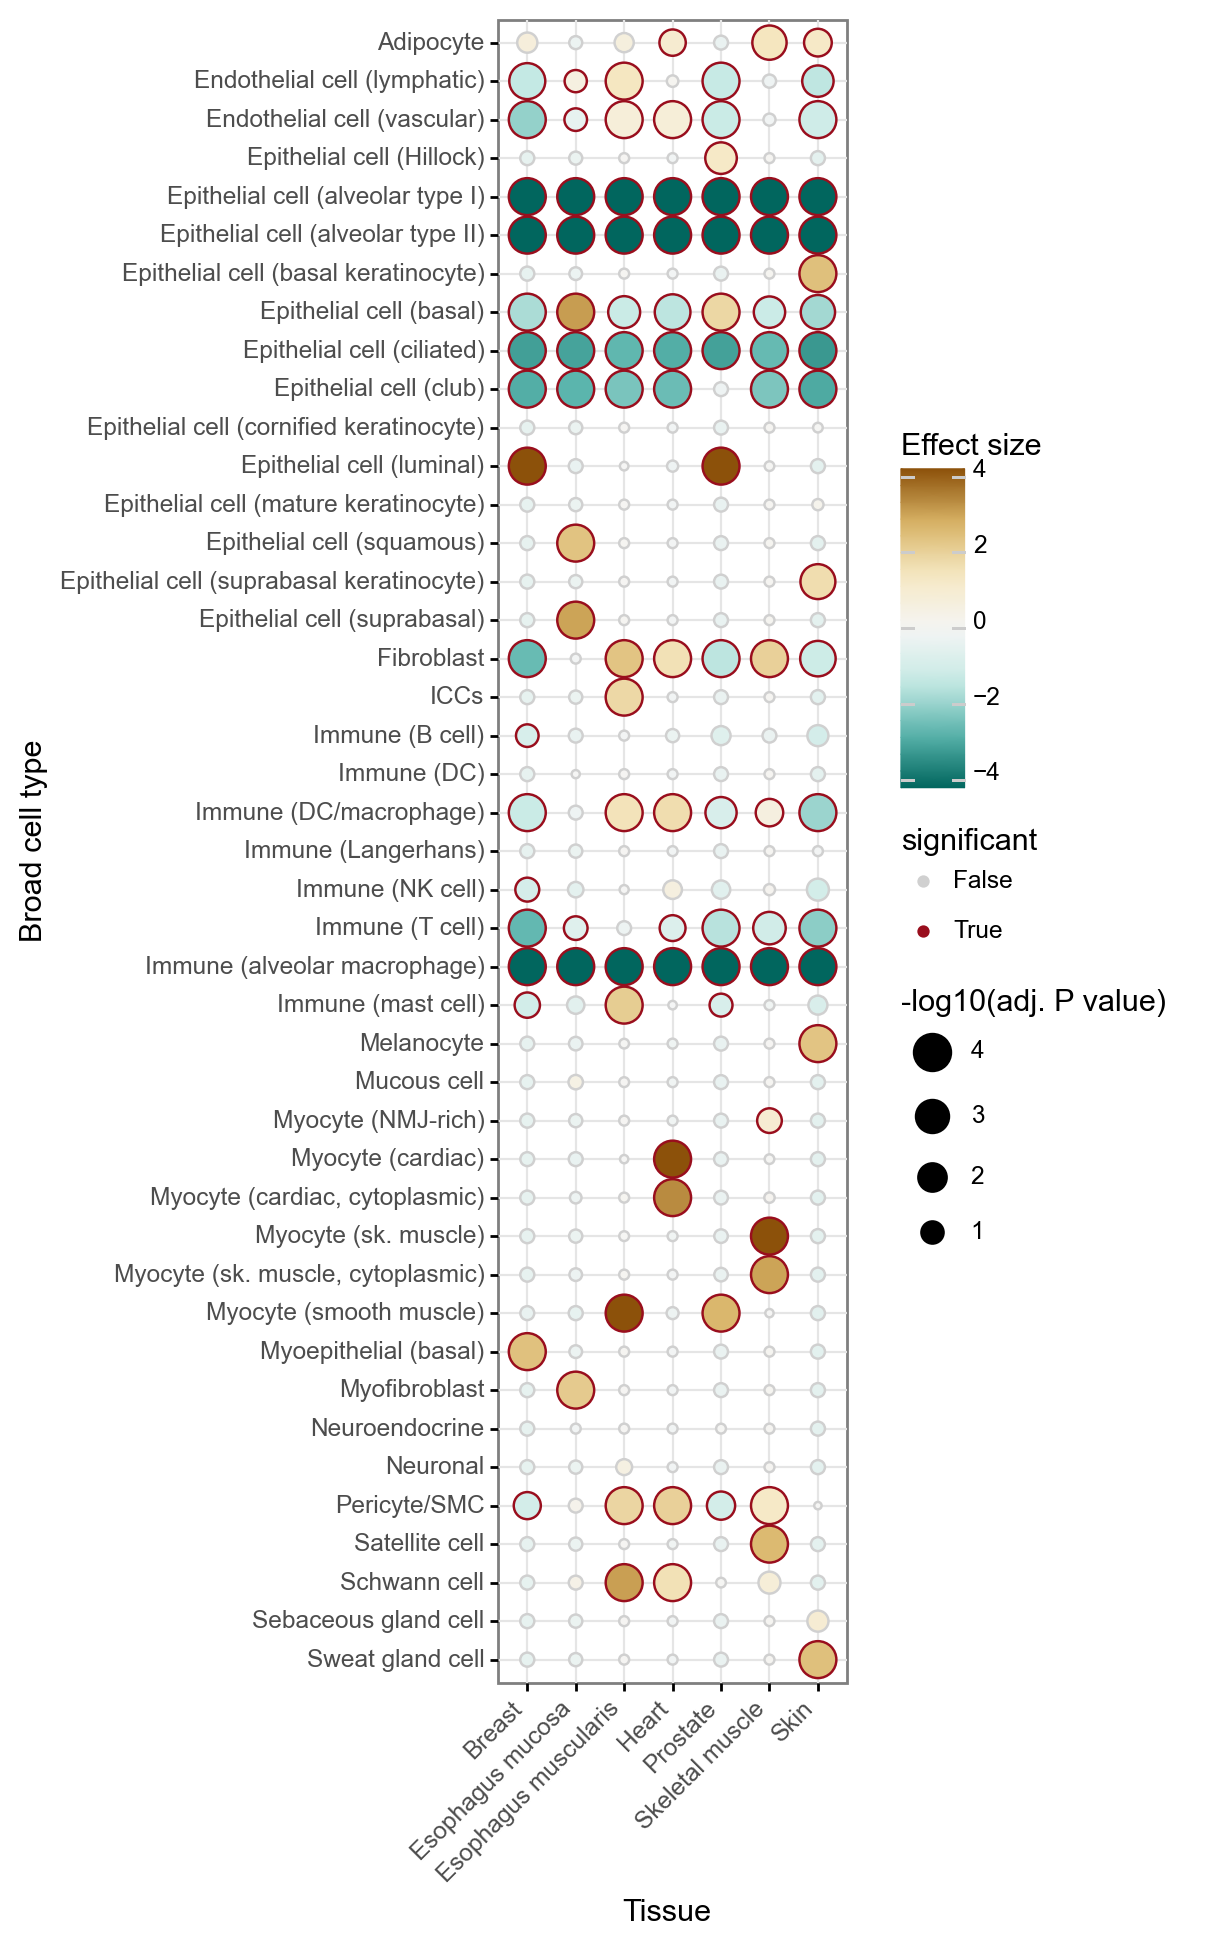

<ggplot: (8757937847637)>

In [52]:
f = plot_significance_dotplot(df[df.variable_tissue.isin(ad.obs.Tissue.cat.categories)], fill_limit=(-4,4), width_scale=0.25, height_scale=0.9, size_limit=4, dot_size_limit=7, xcol='variable_tissue', xlabel='Tissue', ylabel='Broad cell type')
f

In [53]:
p9.ggsave(f, sc.settings.figdir / 'Figure-S01-E-celltype-proportions.pdf')

In [54]:
df = dirichletreg(ad, 'channel', 'Broad cell type', ['Age','Sex', 'tissue', 'prep', 'BMI', 'ischemic_time', 'PercentMito'], 'y ~ prep + tissue + Age + Sex')

In [55]:
df

coefficient        se       zval          pval       compartment  \
0       1.498005  0.396199   3.780946  1.562338e-04         Adipocyte   
1      -0.604593  0.199191  -3.035246  2.403398e-03         Adipocyte   
2      -0.451166  0.178078  -2.533525  1.129216e-02         Adipocyte   
3      -0.188957  0.200010  -0.944736  3.447936e-01         Adipocyte   
4      -0.512789  0.392267  -1.307244  1.911299e-01         Adipocyte   
..           ...       ...        ...           ...               ...   
554     2.408032  0.464080   5.188832  2.116177e-07  Sweat gland cell   
555     2.085977  0.397134   5.252583  1.499809e-07  Sweat gland cell   
556     5.371068  0.393347  13.654778  1.890657e-42  Sweat gland cell   
557    -0.046625  0.008539  -5.459967  4.762230e-08  Sweat gland cell   
558    -1.550051  0.256058  -6.053504  1.417287e-09  Sweat gland cell   

                  variable significance  
0              (Intercept)          ***  
1                   prepEZ           **  
2                  prepNST            *  
3                  prepTST               
4    tissueesophagusmucosa               
..                     ...          ...  
554         tissueprostate          ***  
555   tissueskeletalmuscle          ***  
556             tissueskin          ***  
557                    Age          ***  
558                SexMale          ***  

[559 rows x 7 columns]

In [56]:
from statsmodels.stats.multitest import multipletests

s, p, _, _ = multipletests(df.pval, alpha=0.1, method='fdr_bh')
df['significant'] = s
df['pval_adj'] = p
df['neglog_pval_adj'] = -np.log10(p+1e-200)
df['variable_prep'] = [x.split('prep')[1] if x.startswith('prep') else x for x in df.variable]

In [63]:
df[df.variable.str.startswith('prep')].reset_index(drop=True).to_excel('prep_proportion_results.xlsx', index=False)

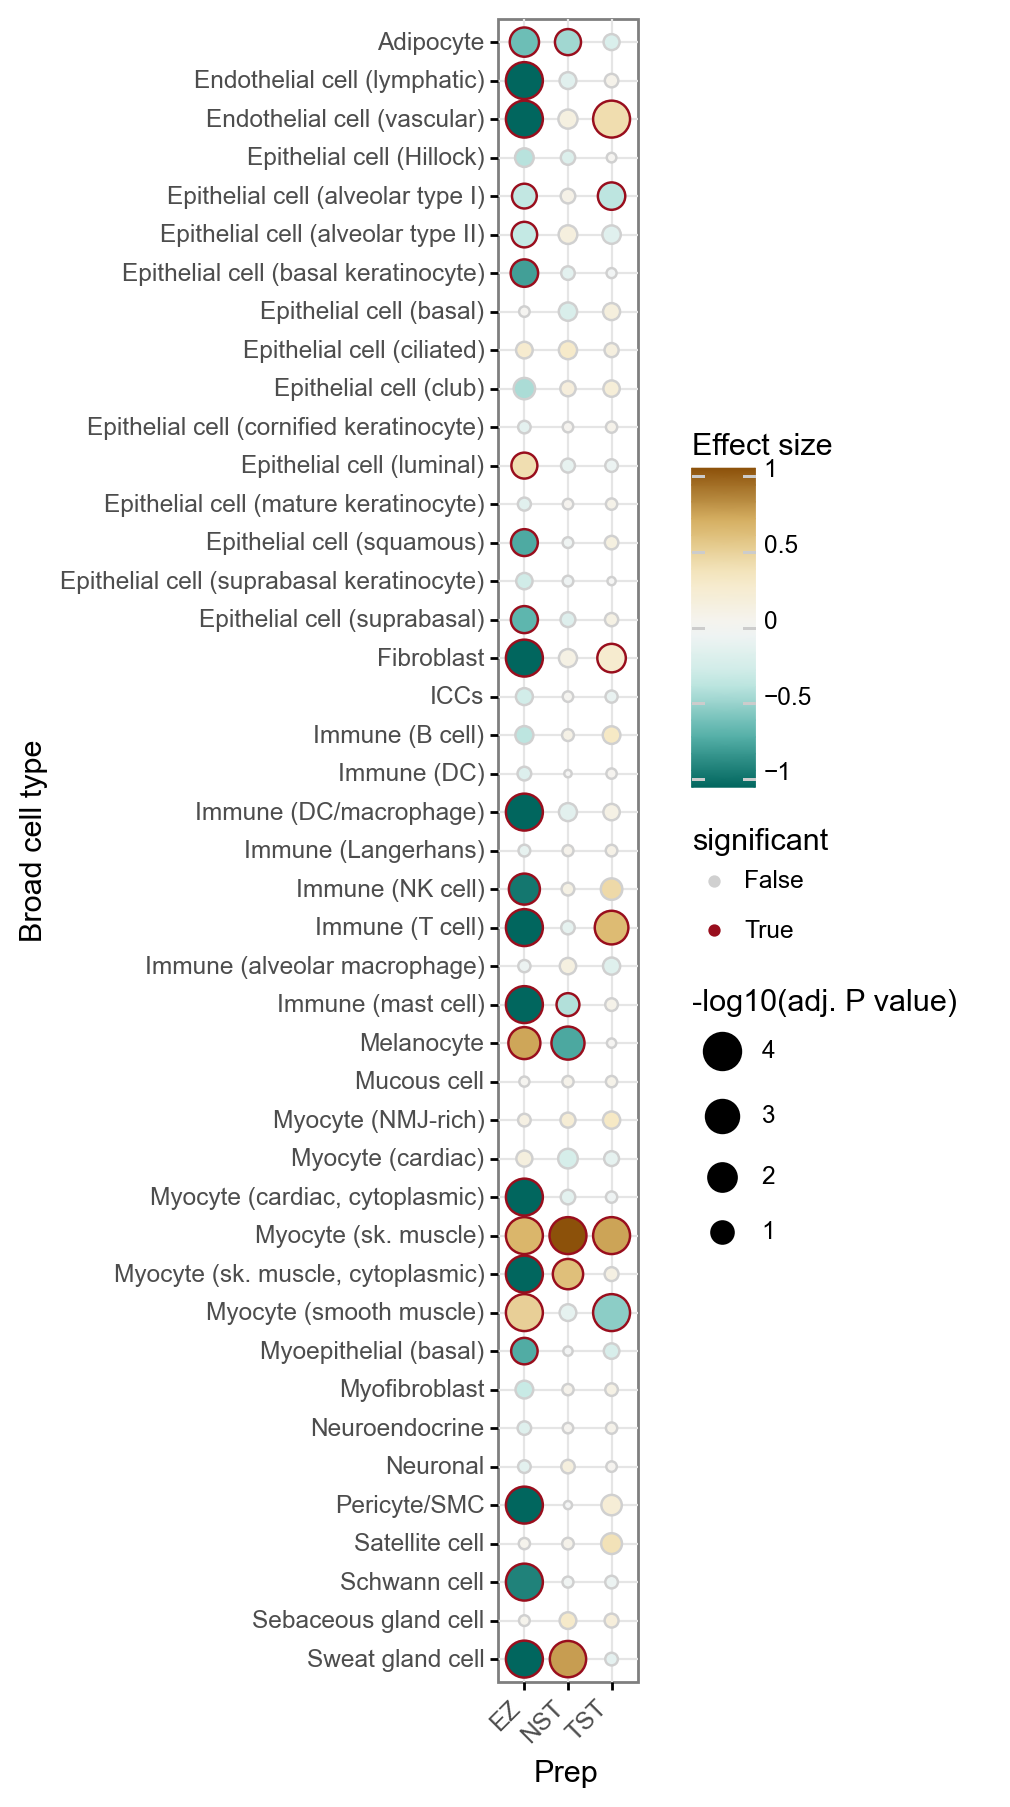

<ggplot: (8757937828711)>

In [58]:
f = plot_significance_dotplot(df[df.variable.str.startswith('prep')], width_scale=0.1, height_scale=0.9, size_limit=4, dot_size_limit=7, fill_limit=[-1,1], xlabel='Prep', xcol='variable_prep', ylabel='Broad cell type')
f

In [59]:
p9.ggsave(f, 'figures/figure-S9-A-dotplot-proportions-celltypes-preps.pdf')

In [109]:
adata.obs.Tissue.cat.categories

Index(['Lung', 'Breast', 'Esophagus mucosa', 'Esophagus muscularis', 'Heart',
       'Prostate', 'Skeletal muscle', 'Skin'],
      dtype='object')

In [110]:
adata.obs['Tissue'].cat.reorder_categories(['Breast', 'Esophagus mucosa', 'Esophagus muscularis', 'Heart', 'Lung', 'Prostate', 'Skeletal muscle', 'Skin'], inplace=True)
ad.obs['Tissue'].cat.reorder_categories(['Breast', 'Esophagus mucosa', 'Esophagus muscularis', 'Heart', 'Lung', 'Prostate', 'Skeletal muscle', 'Skin'], inplace=True)

# Embed samples

In [111]:
def knn2mnn(adata):
    d = adata.uns['neighbors']['distances'] != 0.
    mnn_mask = d.multiply(d.T)
    adata.uns['neighbors']['distances'] = adata.uns['neighbors']['distances'].multiply(mnn_mask)
    adata.uns['neighbors']['connectivities'] = adata.uns['neighbors']['connectivities'].multiply(mnn_mask)

In [112]:
cell_identity = 'Broad cell type'

sample_df = pd.DataFrame(ad.obs.groupby('channel')[cell_identity].value_counts(normalize=True)).rename(columns={cell_identity: 'Freq'}).reset_index().pivot(index='channel', columns=cell_identity).fillna(0)
sample_ad = sc.AnnData(sample_df)
sample_ad.uns['Tissue_colors'] = ad.uns['Tissue_colors']
sample_ad.uns['prep_colors'] = ad.uns['prep_colors']
sample_ad.obs.index = sample_df.index.values
sample_ad.obs = sample_ad.obs.join(ad.obs[['channel', 'Age', 'Sex', 'Tissue', 'prep', 'Participant ID', 'Race/Ethnicity', 'Sample Ischemic Time (mins)']].set_index('channel').drop_duplicates()).set_index(sample_ad.obs.index)

sample_df = sample_df.droplevel(0, axis=1) 
sample_df.index.name = None

In [113]:
sc.pp.neighbors(sample_ad, n_neighbors=7, use_rep='X')
knn2mnn(sample_ad)
sc.tl.draw_graph(sample_ad, layout='fr')

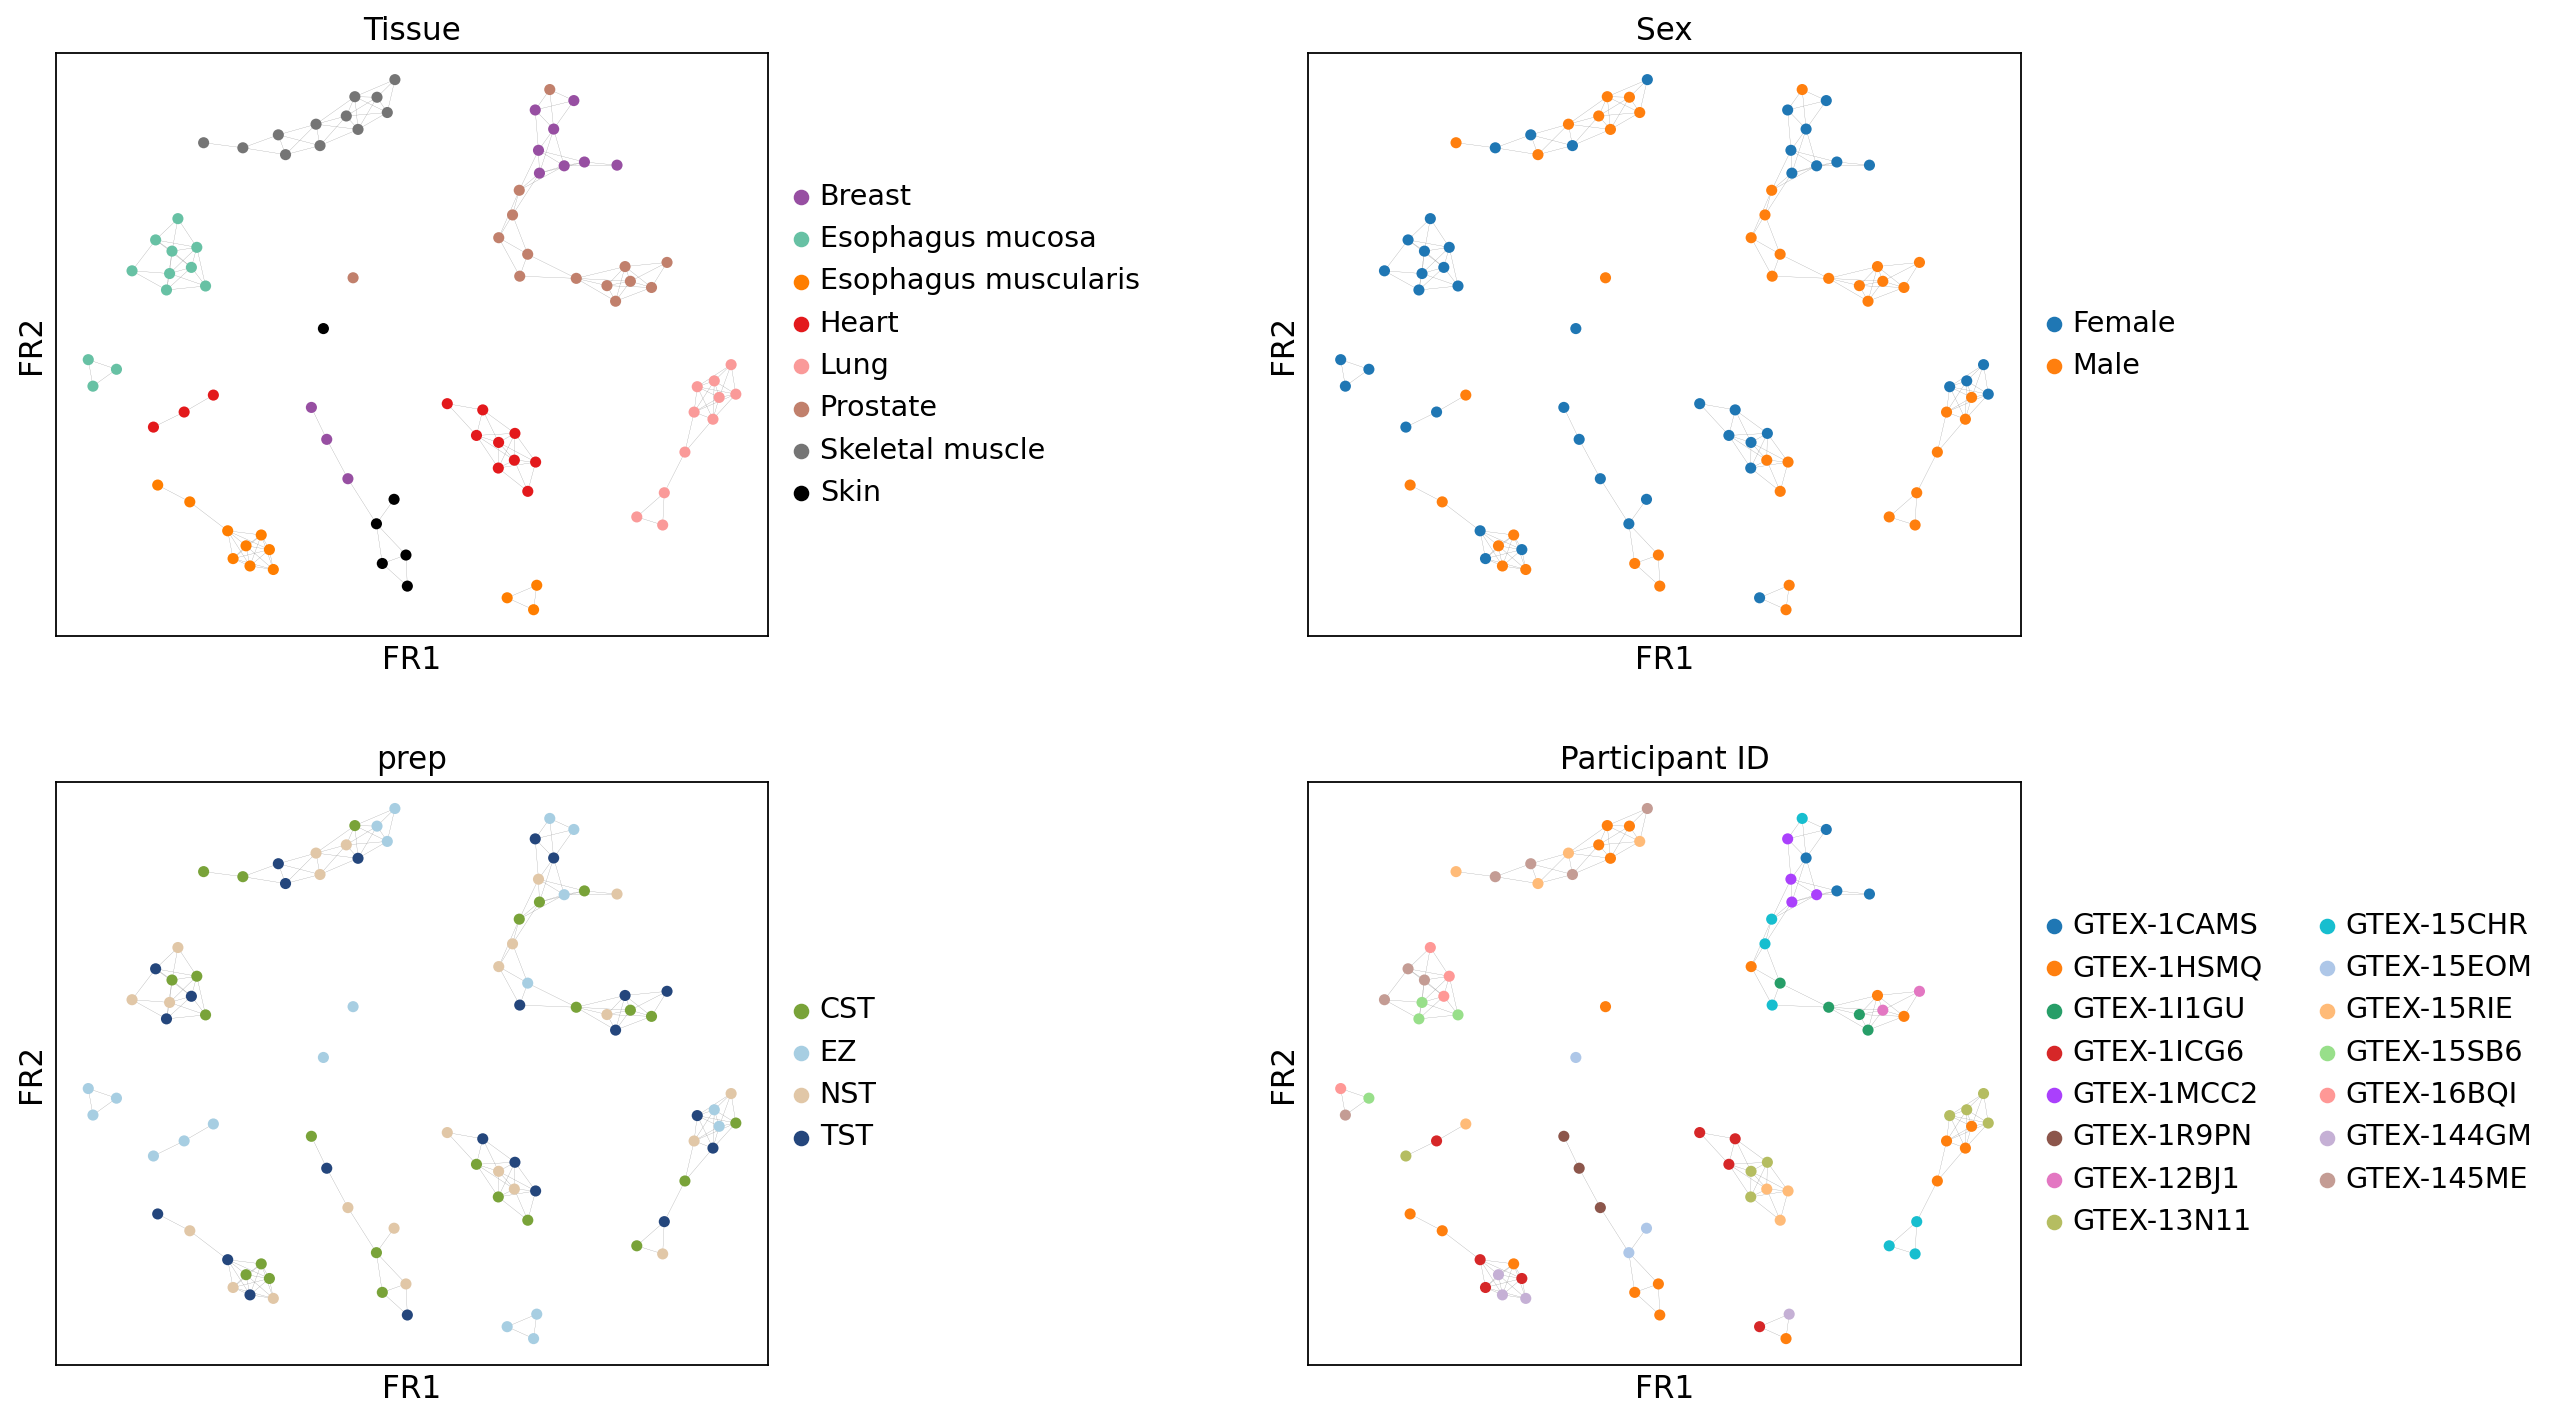

In [114]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['savefig.bbox'] = 'tight'
sc.pl.draw_graph(sample_ad, size=100, color=['Tissue', 'Sex', 'prep', 'Participant ID'], edges=True, wspace=0.6, return_fig=True, ncols=2).savefig(sc.settings.figdir / 'Figure-S01-C-draw_graph_frchannel-embedding.pdf')

## Basic QC metrics: Number of genes, UMIs, percent mito, cells, clusters

In [14]:
ad.obs.columns

Index(['n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs',
       'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID',
       'Participant ID', 'Container', 'Sample ID short',
       'RIN score from PAXgene tissue Aliquot',
       'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity',
       'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail',
       'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts',
       'tissue-individual-prep', 'Broad cell type', 'Granular cell type',
       'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense',
       'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio',
       'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue',
       'Tissue composition', 'Cell types level 2', 'Cell types level 3',
       'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue',
       'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'],
      dtype='object')

In [15]:
ncells_df = ad.obs.groupby(['prep', 'Participant ID', 'Tissue', 'Sex', 'Age', 'Sample Ischemic Time (mins)', 'BMI', 'channel'], observed=True)[['channel']].count().rename(columns={'channel': 'ncells'}).reset_index()

_, channel_df = get_proportions_per_channel(ad, 'channel', 'Broad cell type', covariates=['prep', 'nGenes', 'Tissue', 'nUMIs', 'PercentMito', 'PercentRibo', 'Participant ID', 'Sex', 'Age', 'BMI', 'Sample Ischemic Time (mins)'])
channel_df = channel_df.join(ncells_df.set_index('channel')[['ncells']])

channel_df_model = channel_df.copy()
channel_df_model.rename(columns={'Participant ID': 'individual', 'Sample Ischemic Time (mins)': 'ischemic'}, inplace=True)
channel_df_model['prep'].cat.reorder_categories(['EZ', 'CST', 'NST', 'TST'], inplace=True)
channel_df_model['Tissue'].cat.reorder_categories(['Lung'] + channel_df_model['Tissue'].cat.categories.drop('Lung').tolist(), inplace=True)

In [16]:
channel_df

prep      nGenes  Tissue        nUMIs  PercentMito  \
channel                                                                    
breast_CST_GTEX-1CAMS  CST  707.802691  Breast   904.998901     0.000817   
breast_CST_GTEX-1MCC2  CST  703.459184  Breast   941.653076     0.001098   
breast_CST_GTEX-1R9PN  CST  755.148565  Breast  1023.657837     0.000791   
breast_EZ_GTEX-1CAMS    EZ  813.062069  Breast  1161.544800     0.000424   
breast_EZ_GTEX-1MCC2    EZ  698.262500  Breast   978.325012     0.000176   
...                    ...         ...     ...          ...          ...   
skin_CST_GTEX-15EOM    CST  485.492308    Skin   651.092285     0.000284   
skin_EZ_GTEX-15EOM      EZ  695.164062    Skin   995.648438     0.007256   
skin_NST_GTEX-1HSMQ    NST  647.139361    Skin   849.030579     0.000498   
skin_NST_GTEX-15EOM    NST  535.542857    Skin   678.500000     0.000653   
skin_TST_GTEX-1HSMQ    TST  840.612726    Skin  1147.637451     0.000882   

                       PercentRibo Participant ID     Sex  Age   BMI  \
channel                                                                
breast_CST_GTEX-1CAMS     0.007118     GTEX-1CAMS  Female   40  24.2   
breast_CST_GTEX-1MCC2     0.005971     GTEX-1MCC2  Female   35  31.8   
breast_CST_GTEX-1R9PN     0.003255     GTEX-1R9PN  Female   42  29.2   
breast_EZ_GTEX-1CAMS      0.005302     GTEX-1CAMS  Female   40  24.2   
breast_EZ_GTEX-1MCC2      0.003929     GTEX-1MCC2  Female   35  31.8   
...                            ...            ...     ...  ...   ...   
skin_CST_GTEX-15EOM       0.008369     GTEX-15EOM  Female   29  30.8   
skin_EZ_GTEX-15EOM        0.010233     GTEX-15EOM  Female   29  30.8   
skin_NST_GTEX-1HSMQ       0.006617     GTEX-1HSMQ    Male   57  28.5   
skin_NST_GTEX-15EOM       0.006573     GTEX-15EOM  Female   29  30.8   
skin_TST_GTEX-1HSMQ       0.006246     GTEX-1HSMQ    Male   57  28.5   

                       Sample Ischemic Time (mins)  nGenes_std   nUMIs_std  \
channel                                                                      
breast_CST_GTEX-1CAMS                          415  351.058280  513.860902   
breast_CST_GTEX-1MCC2                          271  372.902549  668.917428   
breast_CST_GTEX-1R9PN                          387  381.551300  650.755240   
breast_EZ_GTEX-1CAMS                           415  482.364981  806.411194   
breast_EZ_GTEX-1MCC2                           271  425.498866  700.291707   
...                                            ...         ...         ...   
skin_CST_GTEX-15EOM                            186  164.766703  266.420059   
skin_EZ_GTEX-15EOM                             186  484.491612  891.759833   
skin_NST_GTEX-1HSMQ                            375  387.838578  706.602691   
skin_NST_GTEX-15EOM                            186  171.276680  228.797787   
skin_TST_GTEX-1HSMQ                            375  454.350340  859.011098   

                       PercentMito_std  PercentRibo_std  Age_std  BMI_std  \
channel                                                                     
breast_CST_GTEX-1CAMS         0.009006         0.004833      0.0      0.0   
breast_CST_GTEX-1MCC2         0.003241         0.003566      0.0      0.0   
breast_CST_GTEX-1R9PN         0.008489         0.005048      0.0      0.0   
breast_EZ_GTEX-1CAMS          0.002725         0.009795      0.0      0.0   
breast_EZ_GTEX-1MCC2          0.001578         0.005921      0.0      0.0   
...                                ...              ...      ...      ...   
skin_CST_GTEX-15EOM           0.000930         0.007497      0.0      0.0   
skin_EZ_GTEX-15EOM            0.009200         0.017119      0.0      0.0   
skin_NST_GTEX-1HSMQ           0.001565         0.006443      0.0      0.0   
skin_NST_GTEX-15EOM           0.002491         0.006579      0.0      0.0   
skin_TST_GTEX-1HSMQ           0.002070         0.009358      0.0      0.0   

                       Sample Ischemic Time (mins)_std  ncells  
channel       

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests

In [129]:
mod = smf.glm(formula='ncells ~ prep + Sex + Age + Tissue + ischemic + BMI', data=channel_df_model, family=sm.families.Poisson()).fit()

In [130]:
coefs = mod.summary2().tables[1]
s, p, _, _ = multipletests(mod.pvalues, method='bonferroni')
coefs['pval_corr'] = p
coefs['significant'] = s
coefs

Coef.  Std.Err.           z          P>|z|  \
Intercept                       6.754284  0.032687  206.633510   0.000000e+00   
prep[T.CST]                     0.703437  0.007191   97.827260   0.000000e+00   
prep[T.NST]                     0.574898  0.007376   77.936877   0.000000e+00   
prep[T.TST]                     0.710229  0.007199   98.652145   0.000000e+00   
Sex[T.Male]                    -0.092667  0.005913  -15.670452   2.408594e-55   
Tissue[T.Breast]               -1.543168  0.013307 -115.968038   0.000000e+00   
Tissue[T.Esophagus mucosa]     -0.890455  0.012477  -71.368893   0.000000e+00   
Tissue[T.Esophagus muscularis] -0.188240  0.009437  -19.947038   1.590361e-88   
Tissue[T.Heart]                -0.002525  0.007759   -0.325423   7.448613e-01   
Tissue[T.Prostate]             -0.372442  0.008571  -43.455119   0.000000e+00   
Tissue[T.Skeletal muscle]      -0.378572  0.008239  -45.947445   0.000000e+00   
Tissue[T.Skin]                 -1.539308  0.015639  -98.429232   0.000000e+00   
Age                            -0.002467  0.000261   -9.461134   3.046216e-21   
ischemic                        0.001018  0.000020   51.264742   0.000000e+00   
BMI                             0.026034  0.000850   30.632610  4.505086e-206   

                                  [0.025    0.975]      pval_corr  significant  
Intercept                       6.690218  6.818350   0.000000e+00         True  
prep[T.CST]                     0.689344  0.717530   0.000000e+00         True  
prep[T.NST]                     0.560440  0.589356   0.000000e+00         True  
prep[T.TST]                     0.696119  0.724339   0.000000e+00         True  
Sex[T.Male]                    -0.104257 -0.081076   3.612891e-54         True  
Tissue[T.Breast]               -1.569249 -1.517087   0.000000e+00         True  
Tissue[T.Esophagus mucosa]     -0.914909 -0.866001   0.000000e+00         True  
Tissue[T.Esophagus muscularis] -0.206736 -0.169743   2.385541e-87         True  
Tissue[T.Heart]                -0.017732  0.012682   1.000000e+00        False  
Tissue[T.Prostate]             -0.389241 -0.355644   0.000000e+00         True  
Tissue[T.Skeletal muscle]      -0.394721 -0.362424   0.000000e+00         True  
Tissue[T.Skin]                 -1.569960 -1.508657   0.000000e+00         True  
Age                            -0.002979 -0.001956   4.569324e-20         True  
ischemic                        0.000979  0.001056   0.000000e+00         True  
BMI                             0.024368  0.027699  6.757630e-205         True

## Number of nuclei

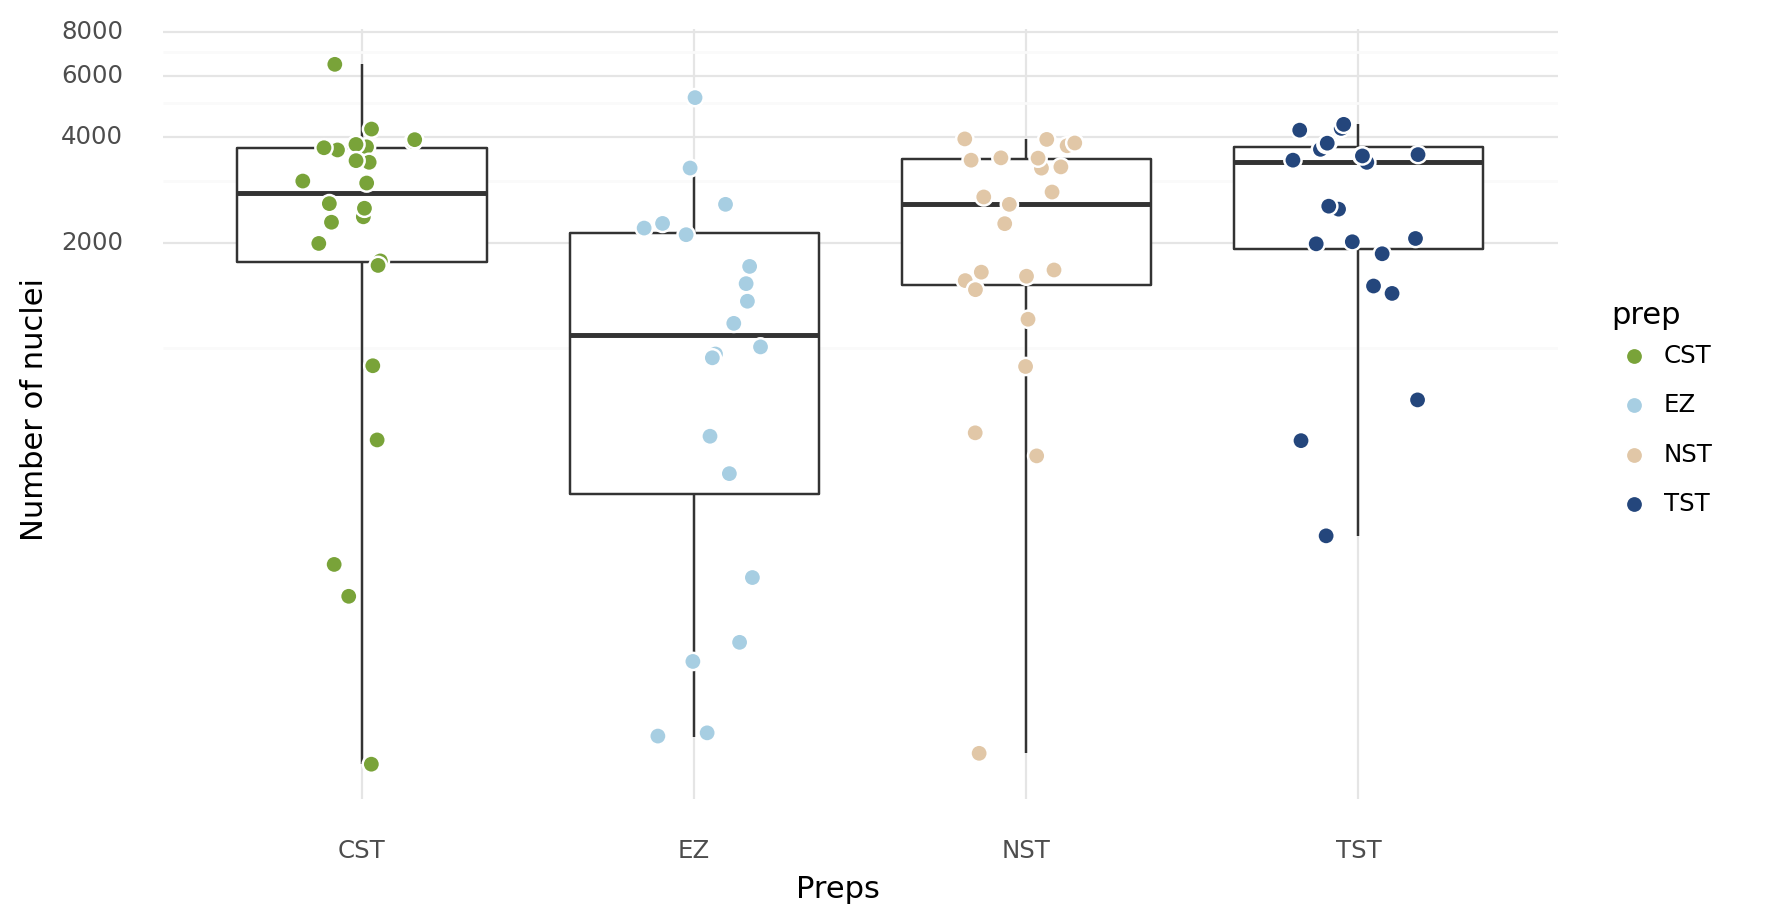

<ggplot: (8732489124979)>

In [87]:
p9.options.figure_size = (9, 5)

g = (p9.ggplot(p9.aes(x='prep', y='ncells', group='prep'), data=channel_df) + 
 #geom_point(size=2.5, color='gray') + 
 #geom_violin(draw_quantiles=[0.5], na_rm=True) +
 p9.geom_boxplot(outlier_stroke=0, outlier_size=0) +
 p9.geom_jitter(width=0.2, size=3, mapping=p9.aes(fill='prep'), color='white', na_rm=True) +
 #p9.geom_violin() + 
 #p9.geom_sina() +
 #facet_wrap('~ tissue') + 
 p9.theme_minimal() +
 p9.coord_trans(y='log10') +
 p9.labs(x='Preps', y='Number of nuclei') +     
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-A-ncells-box.pdf')

g

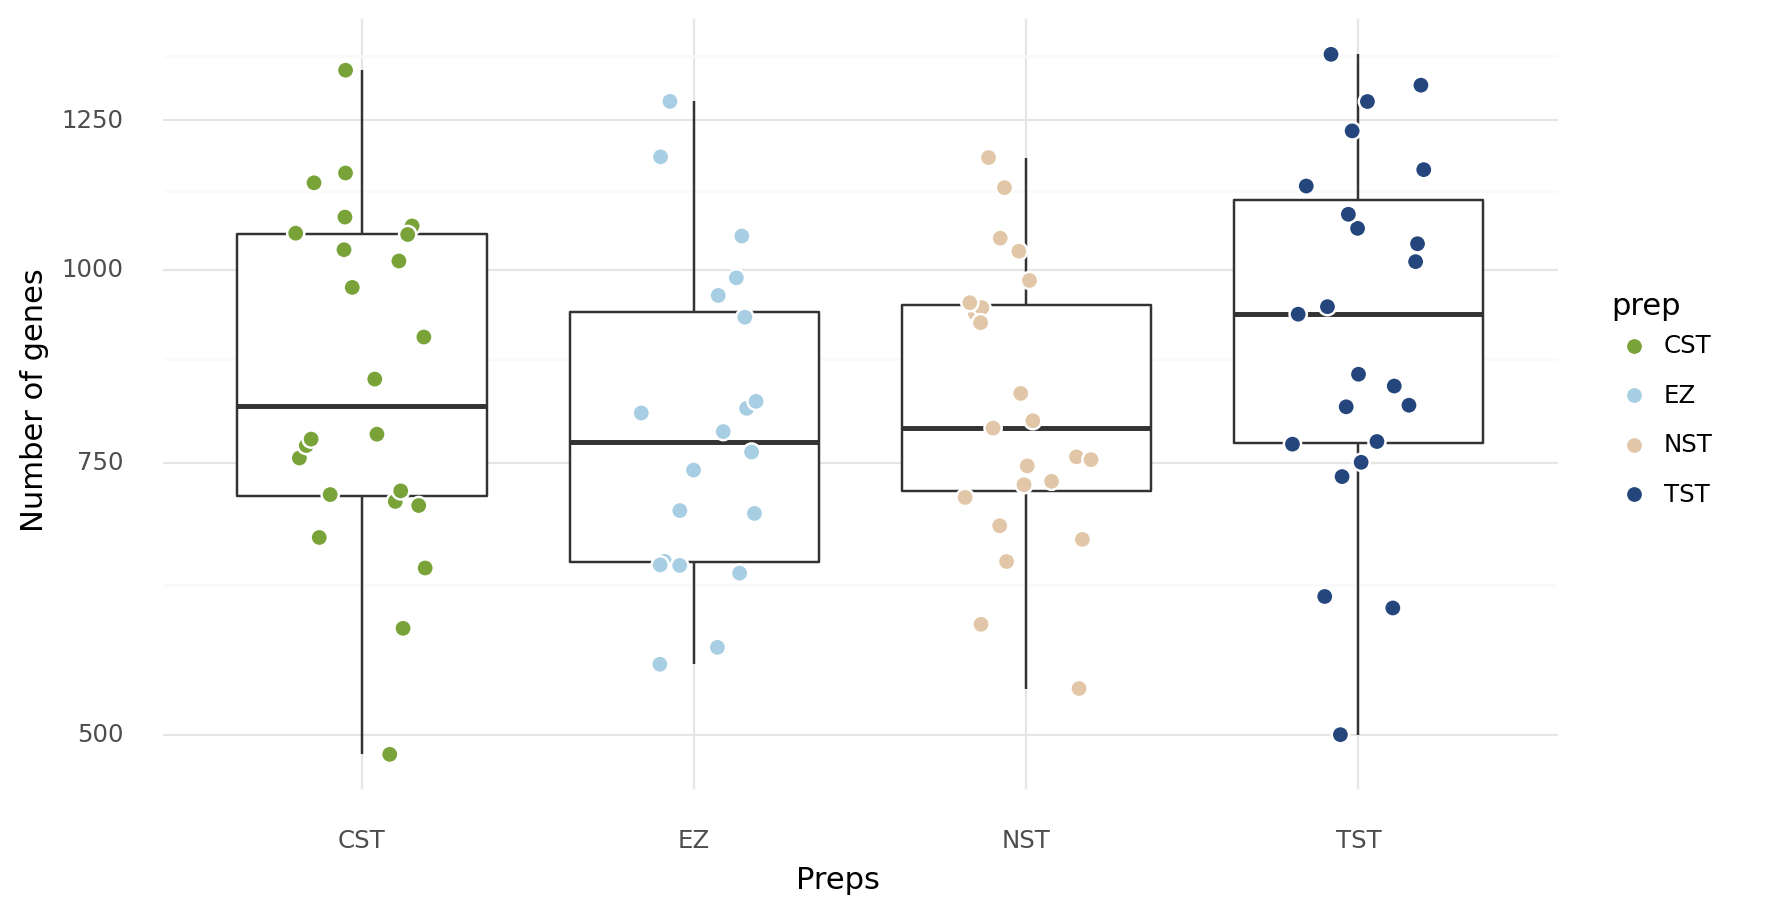

<ggplot: (8785090379153)>

In [81]:
p9.options.figure_size = (9, 5)

g = (p9.ggplot(p9.aes(x='prep', y='nGenes', group='prep'), data=channel_df) + 
 #geom_point(size=2.5, color='gray') + 
 #geom_violin(draw_quantiles=[0.5], na_rm=True) +
 p9.geom_boxplot(outlier_stroke=0, outlier_size=0) +
 p9.geom_jitter(width=0.2, size=3, mapping=p9.aes(fill='prep'), color='white', na_rm=True) +
 #p9.geom_violin() + 
 #p9.geom_sina() +
 #facet_wrap('~ tissue') + 
 p9.theme_minimal() +
 p9.coord_trans(y='log10') +
 p9.labs(x='Preps', y='Number of genes') +     
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-C-nGenes-box.pdf')

g

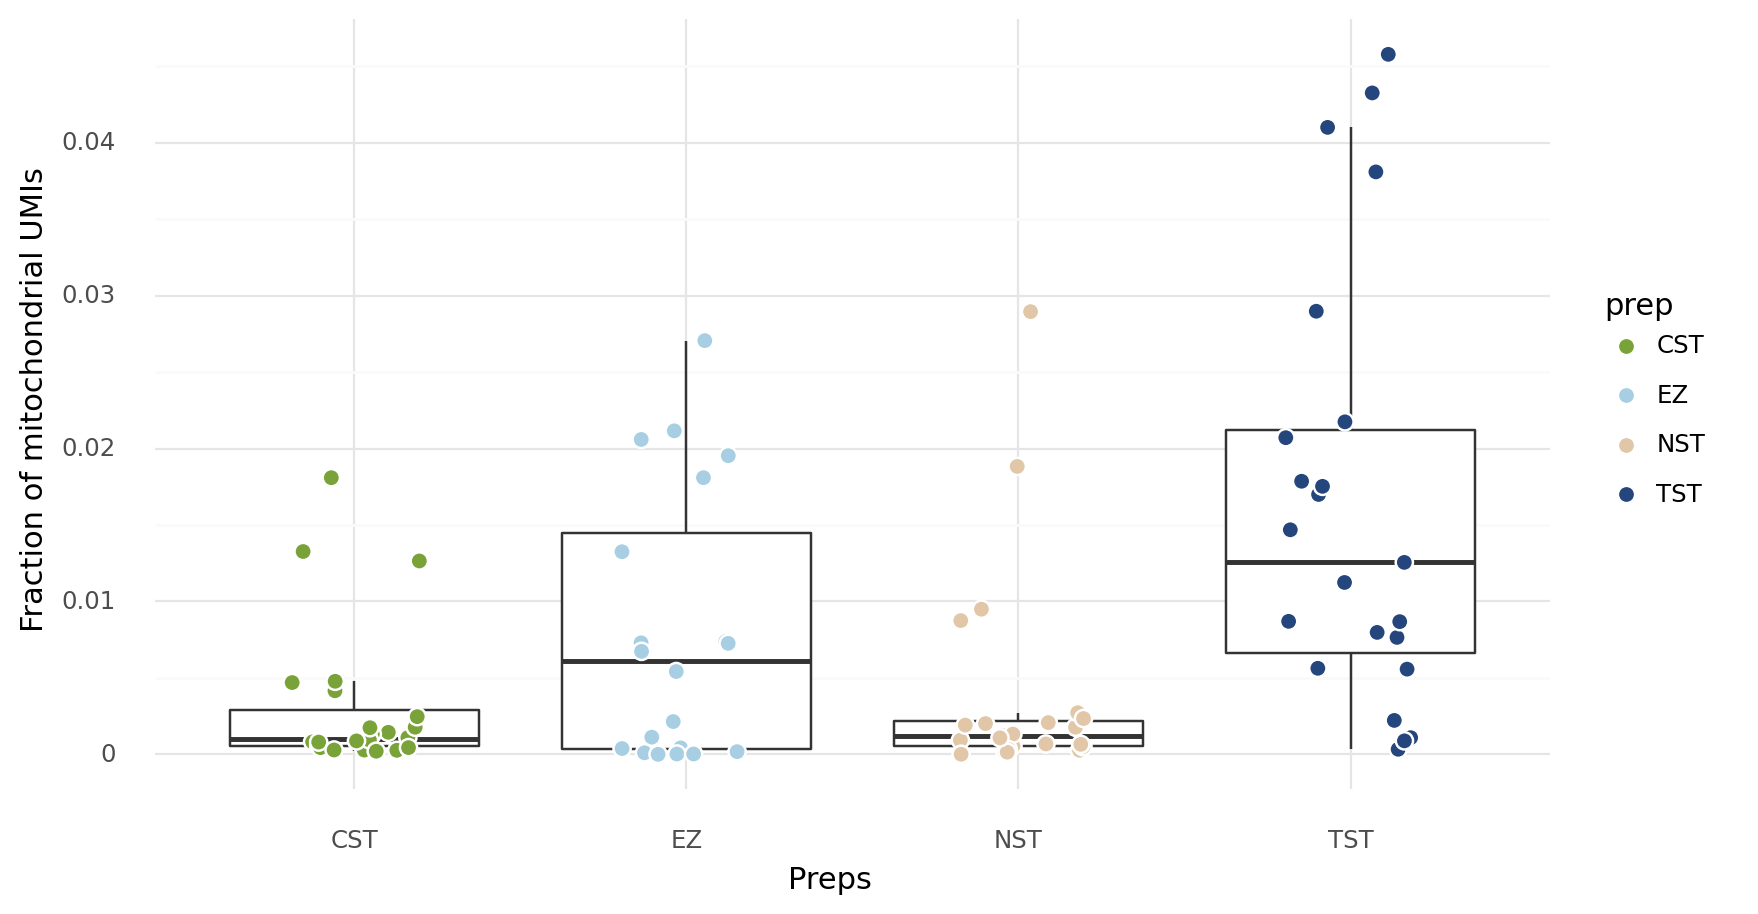

<ggplot: (8753062203715)>

In [131]:
p9.options.figure_size = (9, 5)

g = (p9.ggplot(p9.aes(x='prep', y='PercentMito', group='prep'), data=channel_df) + 
 #geom_point(size=2.5, color='gray') + 
 #geom_violin(draw_quantiles=[0.5], na_rm=True) +
 p9.geom_boxplot(outlier_stroke=0, outlier_size=0) +
 p9.geom_jitter(width=0.2, size=3, mapping=p9.aes(fill='prep'), color='white', na_rm=True) +
 #p9.geom_violin() + 
 #p9.geom_sina() +
 #facet_wrap('~ tissue') + 
 p9.theme_minimal() +
 #p9.coord_trans(y='log10') +
 p9.labs(x='Preps', y='Fraction of mitochondrial UMIs') +     
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-F-percentmito-box.pdf')

g

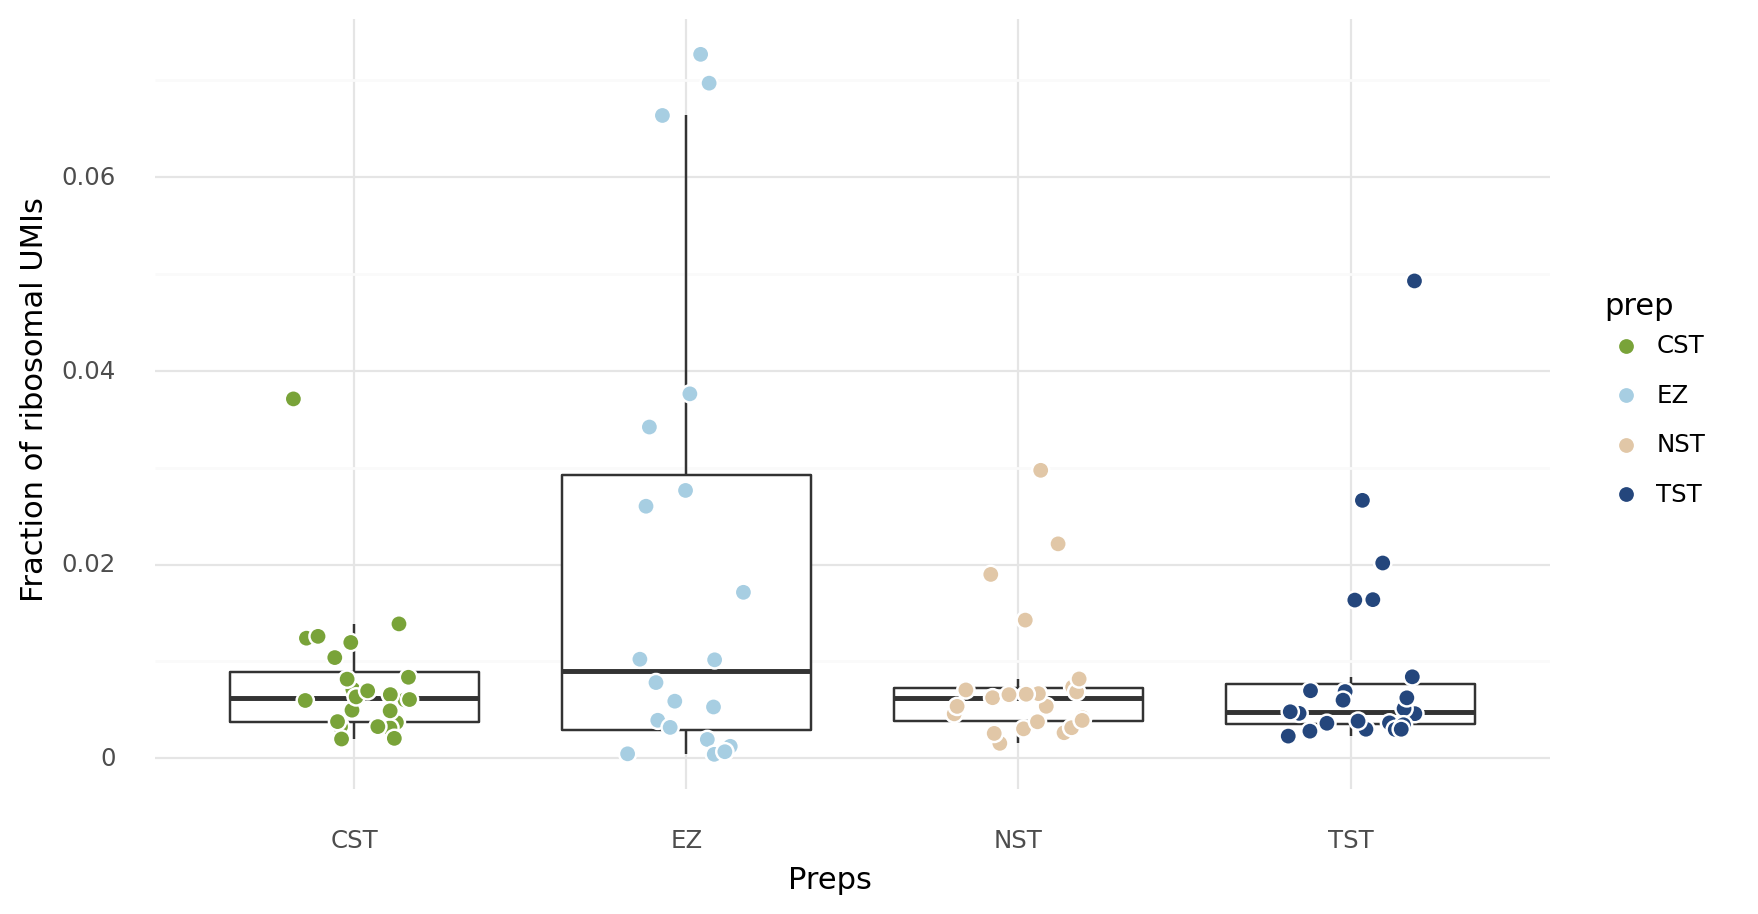

<ggplot: (8784935761285)>

In [83]:
p9.options.figure_size = (9, 5)

g = (p9.ggplot(p9.aes(x='prep', y='PercentRibo', group='prep'), data=channel_df) + 
 #geom_point(size=2.5, color='gray') + 
 #geom_violin(draw_quantiles=[0.5], na_rm=True) +
 p9.geom_boxplot(outlier_stroke=0, outlier_size=0) +
 p9.geom_jitter(width=0.2, size=3, mapping=p9.aes(fill='prep'), color='white', na_rm=True) +
 #p9.geom_violin() + 
 #p9.geom_sina() +
 #facet_wrap('~ tissue') + 
 p9.theme_minimal() +
 #p9.coord_trans(y='log10') +
 p9.labs(x='Preps', y='Fraction of ribosomal UMIs') +     
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-I-percentribo-box.pdf')

g

## nUMIs

In [84]:
mod = smf.glm(formula='nGenes ~ prep + Sex + Age + Tissue + ischemic + BMI + PercentMito + PercentRibo', data=channel_df_model, family=sm.families.Poisson()).fit()

In [85]:
coefs = mod.summary2().tables[1]
s, p, _, _ = multipletests(mod.pvalues, method='bonferroni')
coefs['pval_corr'] = p
coefs['significant'] = s
coefs

Coef.  Std.Err.           z          P>|z|  \
Intercept                       6.602464  0.054852  120.367678   0.000000e+00   
prep[T.CST]                     0.065239  0.011160    5.845917   5.037867e-09   
prep[T.NST]                     0.021112  0.011336    1.862326   6.255712e-02   
prep[T.TST]                     0.209549  0.012238   17.122768   1.003869e-65   
Sex[T.Male]                     0.067372  0.010432    6.458359   1.058446e-10   
Tissue[T.Breast]               -0.340492  0.018819  -18.093215   3.604339e-73   
Tissue[T.Esophagus mucosa]     -0.180436  0.019753   -9.134442   6.574501e-20   
Tissue[T.Esophagus muscularis] -0.233567  0.016651  -14.027117   1.063886e-44   
Tissue[T.Heart]                 0.129013  0.013836    9.324327   1.116903e-20   
Tissue[T.Prostate]              0.019120  0.015325    1.247628   2.121673e-01   
Tissue[T.Skeletal muscle]      -0.367731  0.015303  -24.029259  1.375574e-127   
Tissue[T.Skin]                 -0.489188  0.019715  -24.813080  6.477424e-136   
Age                            -0.001421  0.000447   -3.177123   1.487441e-03   
ischemic                        0.000368  0.000032   11.331037   9.210725e-30   
BMI                             0.006614  0.001409    4.693177   2.689942e-06   
PercentMito                    -6.150561  0.501603  -12.261818   1.452055e-34   
PercentRibo                     0.650056  0.349650    1.859160   6.300453e-02   

                                  [0.025    0.975]      pval_corr  significant  
Intercept                       6.494955  6.709973   0.000000e+00         True  
prep[T.CST]                     0.043366  0.087112   8.564373e-08         True  
prep[T.NST]                    -0.001107  0.043331   1.000000e+00        False  
prep[T.TST]                     0.185563  0.233536   1.706578e-64         True  
Sex[T.Male]                     0.046926  0.087818   1.799358e-09         True  
Tissue[T.Breast]               -0.377376 -0.303608   6.127376e-72         True  
Tissue[T.Esophagus mucosa]     -0.219152 -0.141720   1.117665e-18         True  
Tissue[T.Esophagus muscularis] -0.266203 -0.200932   1.808606e-43         True  
Tissue[T.Heart]                 0.101894  0.156131   1.898735e-19         True  
Tissue[T.Prostate]             -0.010917  0.049156   1.000000e+00        False  
Tissue[T.Skeletal muscle]      -0.397725 -0.337737  2.338476e-126         True  
Tissue[T.Skin]                 -0.527828 -0.450547  1.101162e-134         True  
Age                            -0.002297 -0.000544   2.528649e-02         True  
ischemic                        0.000304  0.000431   1.565823e-28         True  
BMI                             0.003852  0.009376   4.572901e-05         True  
PercentMito                    -7.133684 -5.167438   2.468494e-33         True  
PercentRibo                    -0.035246  1.335358   1.000000e+00        False

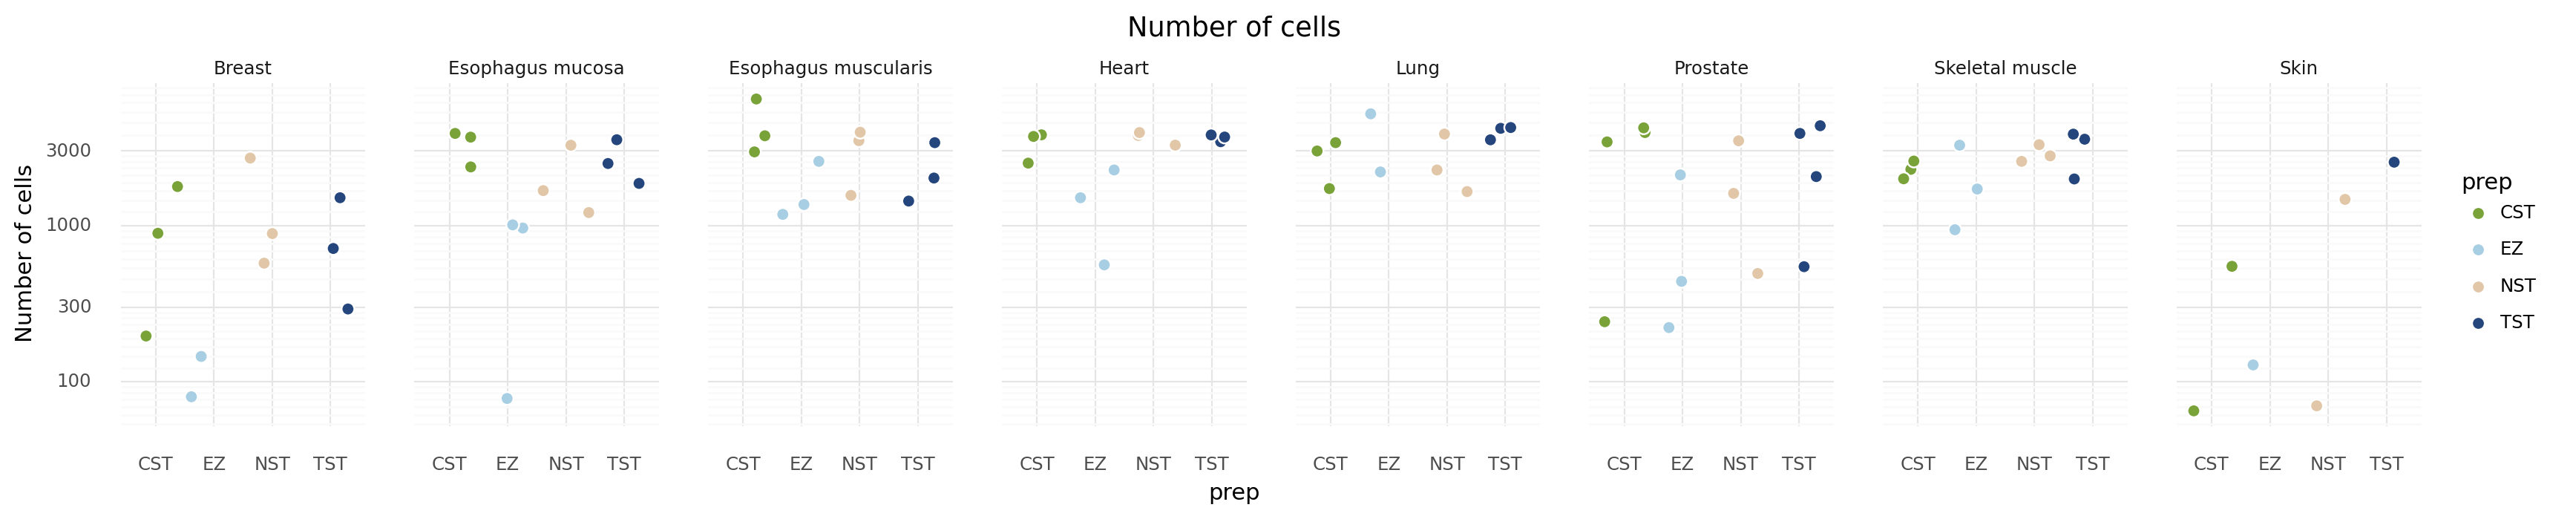

<ggplot: (8784935160697)>

In [86]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='ncells'), data=channel_df) + 
 p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue', scales='free_x', ncol=10) + 
 p9.theme_minimal() +
 p9.labs(title='Number of cells', y='Number of cells') + 
 p9.scale_y_log10() +
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-B-ncells-jitter.pdf')

g

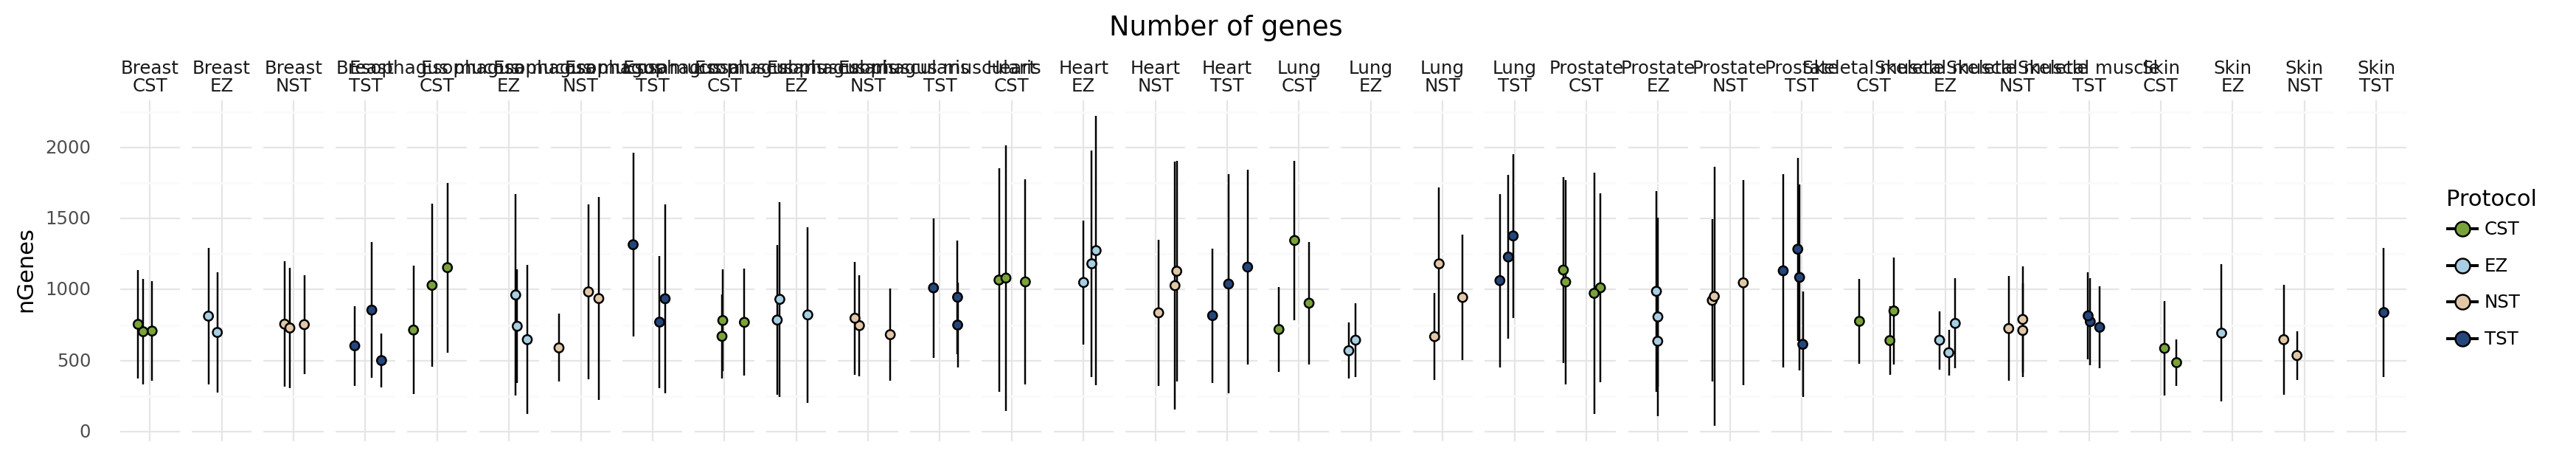

<ggplot: (8757940779198)>

In [22]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='nGenes'), data=channel_df) + 
 #p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 p9.geom_pointrange(p9.aes(fill='prep', ymin = 'np.maximum(nGenes-nGenes_std,0)', ymax = 'nGenes+nGenes_std'), size=0.5, position=p9.position_jitter(width=0.4))+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue+prep', scales='free_x', nrow=1) + 
 p9.theme_minimal() +
 p9.ggtitle('Number of genes') + 
# p9.scale_y_log10() +
 p9.labs(fill='Protocol', x='')+
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}, axis_text_x=p9.element_blank()) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-D-nGenes-jitter.pdf')

g

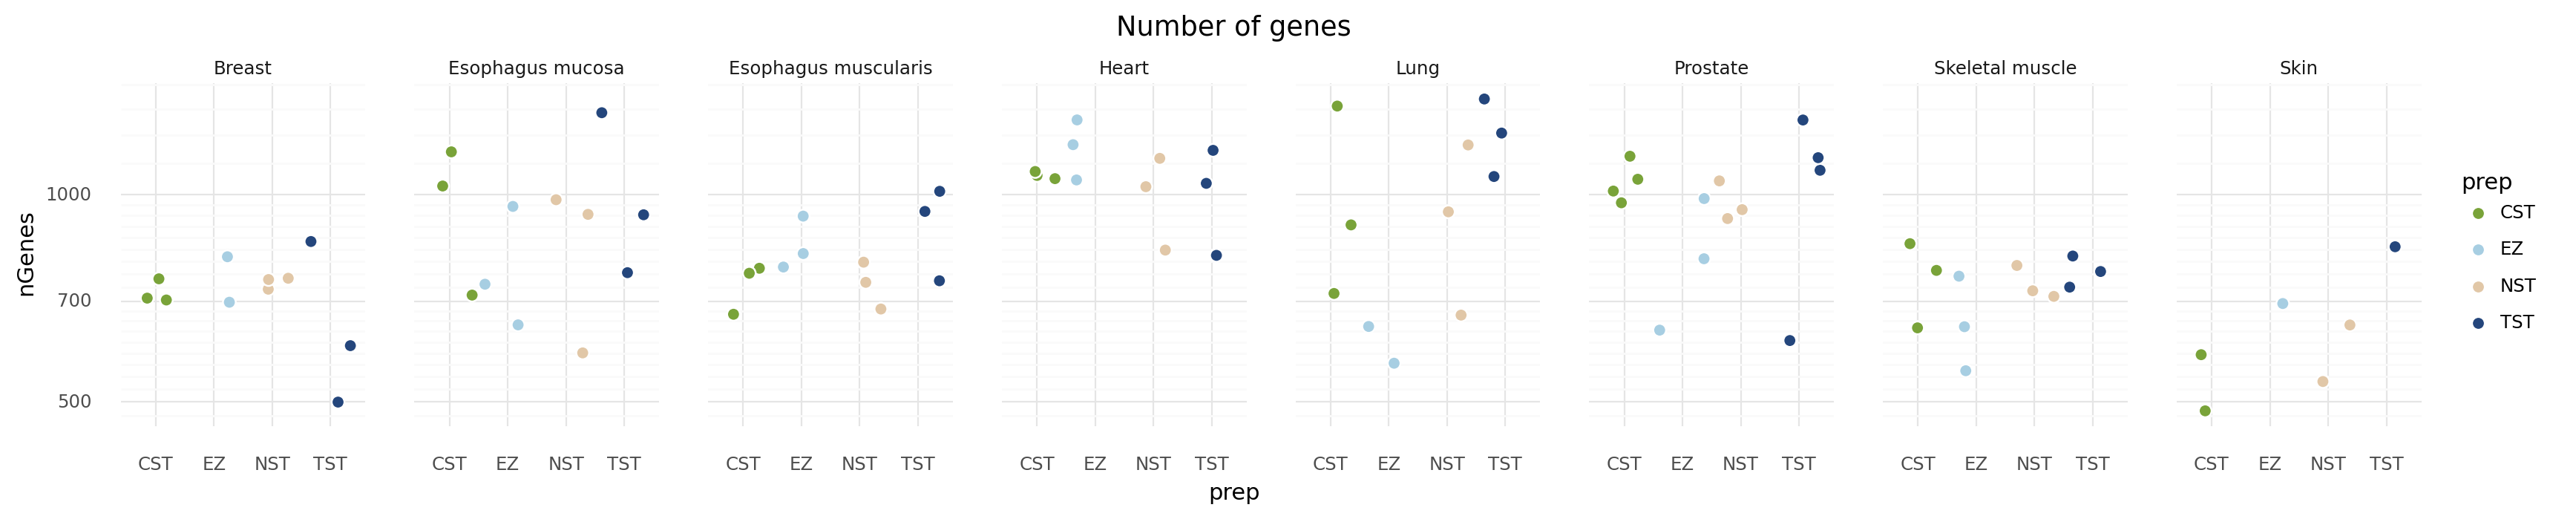

<ggplot: (8784835930649)>

In [87]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='nGenes'), data=channel_df) + 
 #p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 p9.geom_pointrange(p9.aes(fill='prep', ymin = 'np.maximum(nGenes-nGenes_std,0)', ymax = 'nGenes+nGenes_std'), size=0.5, position=p9.position_jitter(width=0.4))+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue+prep', scales='free_x', nrow=1) + 
 p9.theme_minimal() +
 p9.ggtitle('Number of genes') + 
# p9.scale_y_log10() +
 p9.labs(fill='Protocol', x='')+
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}, axis_text_x=p9.element_blank()) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-D-nGenes-jitter.pdf')

g

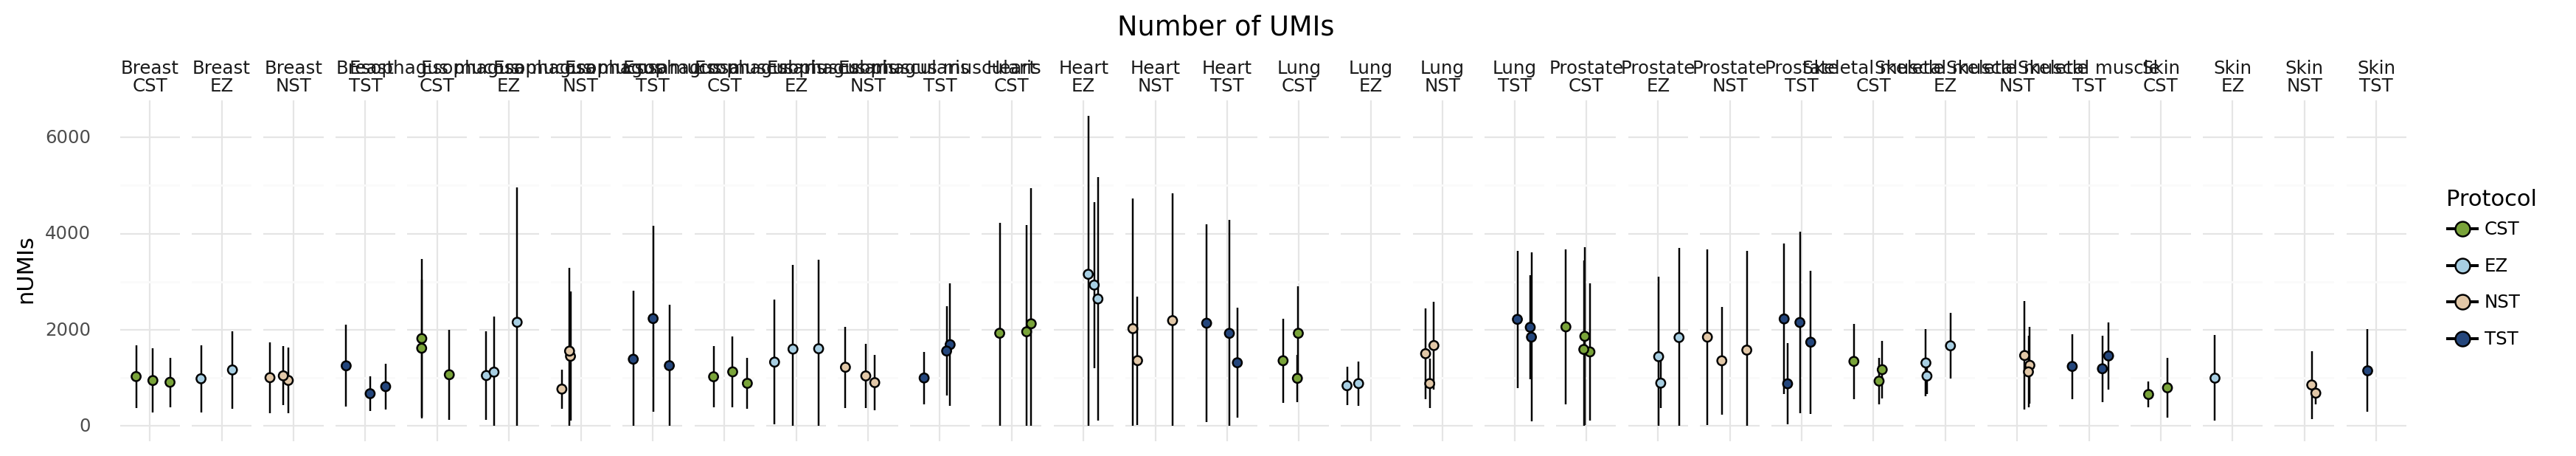

<ggplot: (8732488281622)>

In [89]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='nUMIs'), data=channel_df) + 
 #p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 p9.geom_pointrange(p9.aes(fill='prep', ymin = 'np.maximum(nUMIs-nUMIs_std,0)', ymax = 'nUMIs+nUMIs_std'), size=0.5, position=p9.position_jitter(width=0.4))+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue+prep', scales='free_x', nrow=1) + 
 p9.theme_minimal() +
 p9.ggtitle('Number of UMIs') + 
# p9.scale_y_log10() +
 p9.labs(fill='Protocol', x='')+
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}, axis_text_x=p9.element_blank()) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-L-nUMIs-jitter.pdf')

g

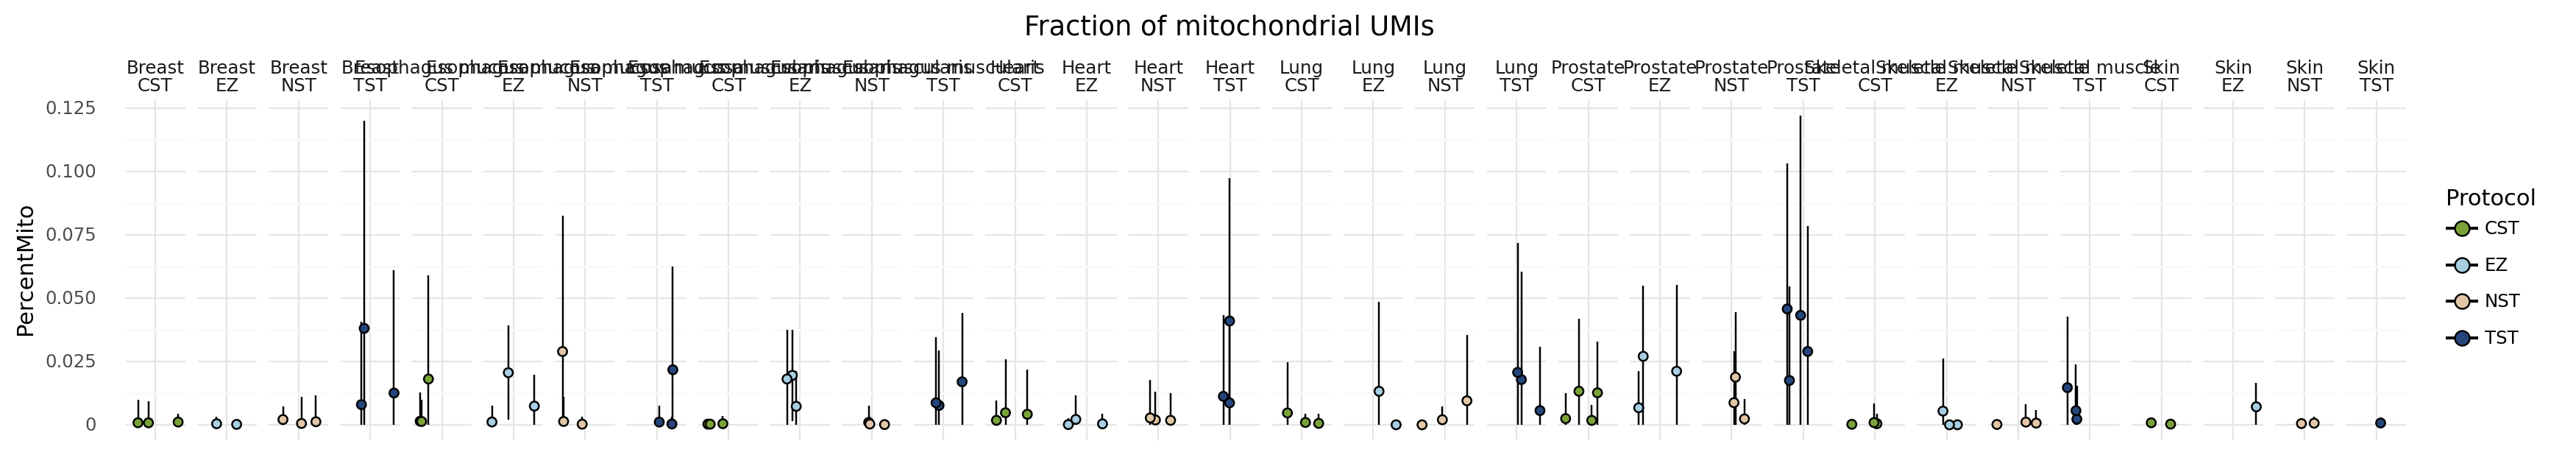

<ggplot: (8732489132834)>

In [85]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='PercentMito'), data=channel_df) + 
 #p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 p9.geom_pointrange(p9.aes(fill='prep', ymin = 'np.maximum(PercentMito-PercentMito_std,0)', ymax = 'PercentMito+PercentMito_std'), size=0.5, position=p9.position_jitter(width=0.4))+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue+prep', scales='free_x', nrow=1) + 
 p9.theme_minimal() +
 p9.ggtitle('Fraction of mitochondrial UMIs') + 
# p9.scale_y_log10() +
 p9.labs(fill='Protocol', x='')+
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}, axis_text_x=p9.element_blank()) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-G-percentmito-jitter.pdf')

g

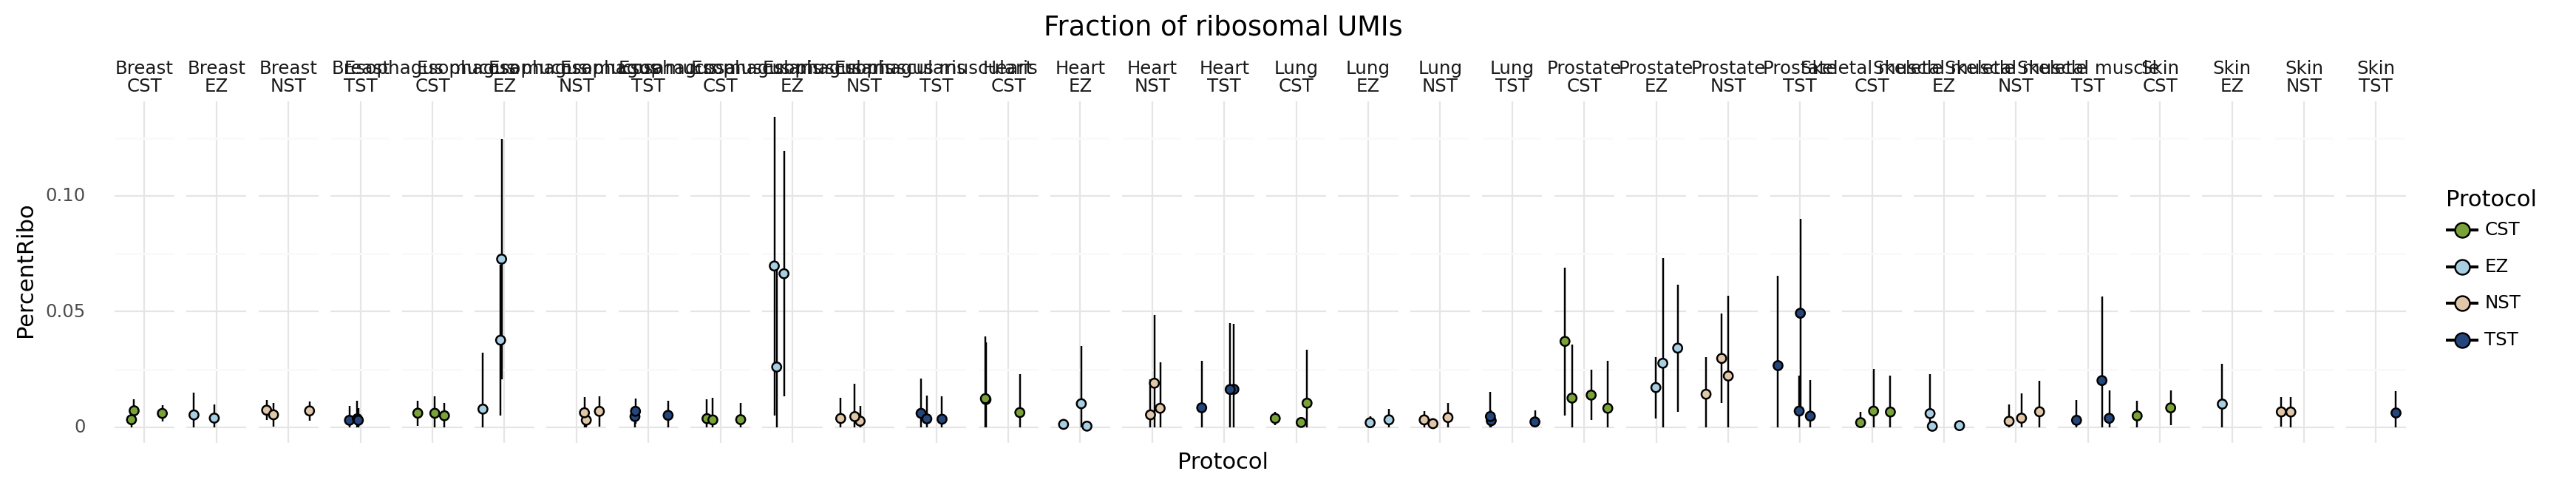

<ggplot: (8732488515148)>

In [86]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='PercentRibo'), data=channel_df) + 
 #p9.geom_jitter(p9.aes(fill='prep'), color='white', size=3)+
 p9.geom_pointrange(p9.aes(fill='prep', ymin = 'np.maximum(PercentRibo-PercentRibo_std,0)', ymax = 'PercentRibo+PercentRibo_std'), size=0.5, position=p9.position_jitter(width=0.4))+
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue+prep', scales='free_x', nrow=1) + 
 p9.theme_minimal() +
 p9.ggtitle('Fraction of ribosomal UMIs') + 
# p9.scale_y_log10() +
 p9.labs(fill='Protocol', x='Protocol')+
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}, axis_text_x=p9.element_blank()) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-J-percentribo-jitter.pdf')

g

## Cell level plots

In [91]:
df = adata.obs[['prep', 'nGenes', 'Tissue', 'nUMIs', 'PercentMito', 'PercentRibo', 'Participant ID', 'Broad cell type', 'Sex', 'Age', 'BMI', 'Sample Ischemic Time (mins)']]

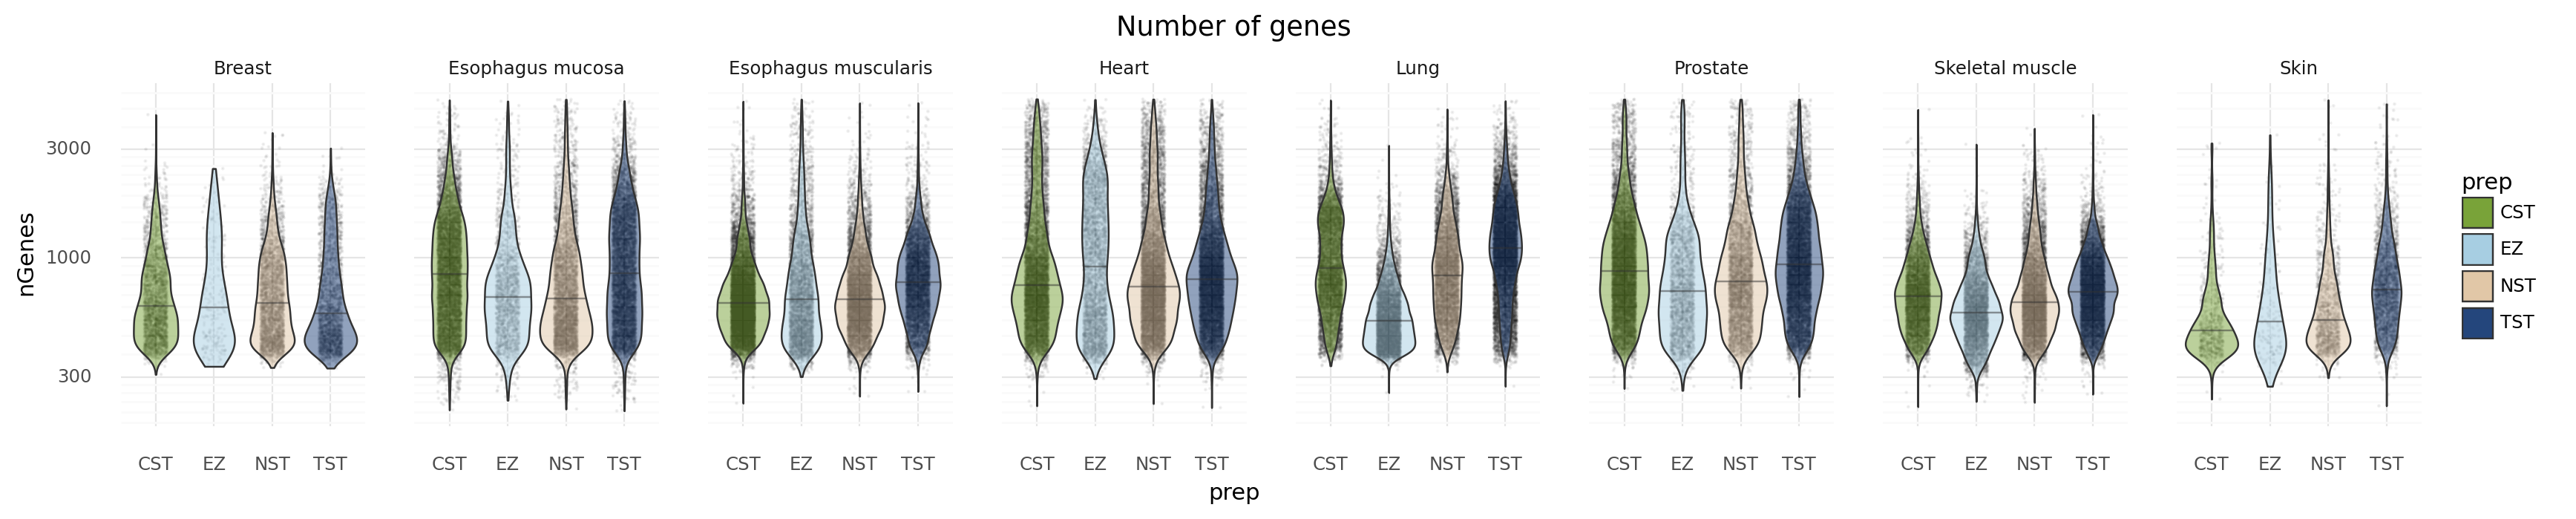

<ggplot: (8785088470426)>

In [92]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='nGenes'), data=df) + 
 p9.geom_jitter(width=.2, height=0, alpha=0.05, size=0.005) +
 p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 p9.facet_wrap('~ Tissue', scales='free_x', ncol=10) + 
 p9.theme_minimal() +
 p9.ggtitle('Number of genes') + 
 p9.scale_y_log10() +
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 #coord_trans(y='log10') +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-E-ngenes-violin.pdf')

g

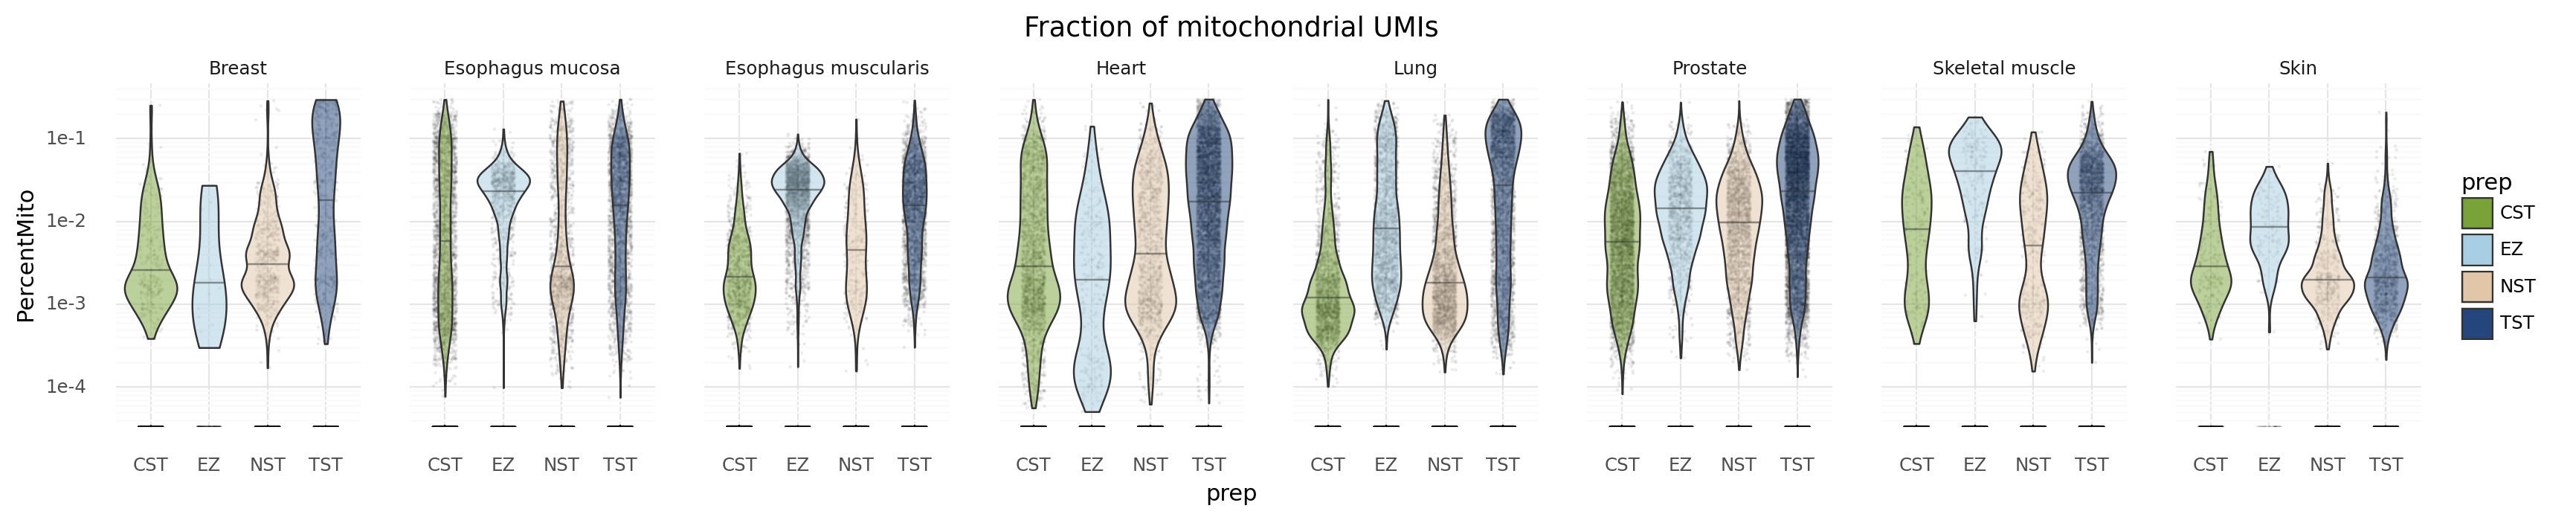

<ggplot: (8784935170320)>

In [93]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='PercentMito'), data=df) + 
 p9.geom_jitter(width=.2, height=0, alpha=0.05, size=0.005) +
 p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5) +      
 p9.facet_wrap('~ Tissue', scales='free_x', ncol=10) + 
 p9.theme_minimal() +
 p9.ggtitle('Fraction of mitochondrial UMIs') + 
 p9.scale_y_log10() +
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-H-percentmito-violin.pdf')

g

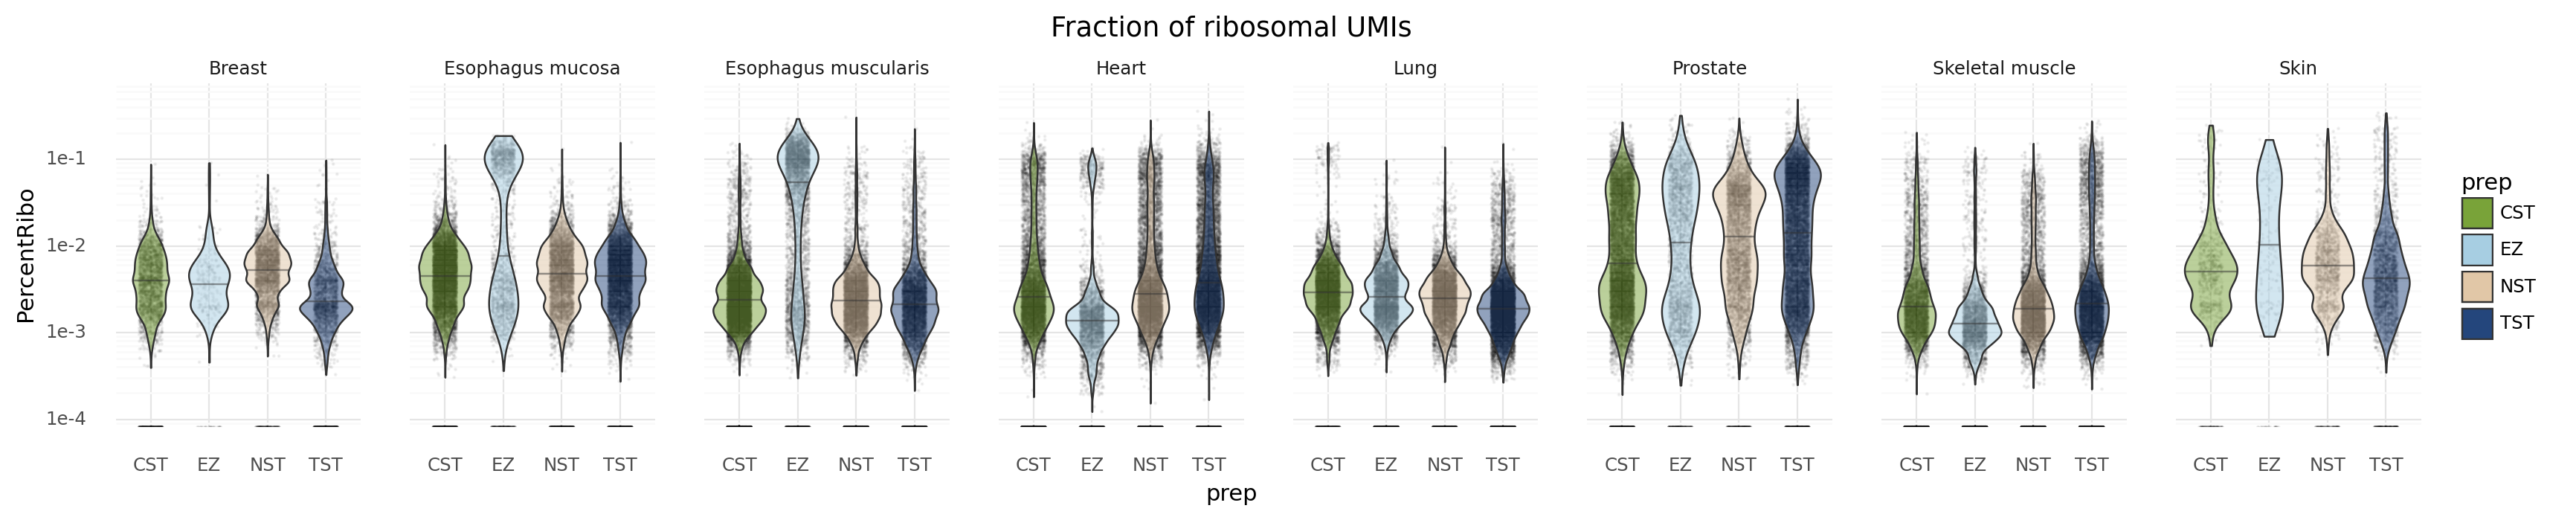

<ggplot: (8784587984933)>

In [94]:
p9.options.figure_size = (20, 3)

g = (p9.ggplot(p9.aes(x='prep', y='PercentRibo'), data=df) + 
 p9.geom_jitter(width=.2, height=0, alpha=0.05, size=0.005) +
 p9.geom_violin(p9.aes(fill='prep'), alpha=0.5, draw_quantiles = [0.5]) + 
 #p9.geom_violin(p9.aes(fill='prep'), alpha=0.5) +      
 p9.facet_wrap('~ Tissue', scales='free_x', ncol=10) + 
 p9.theme_minimal() +
 p9.ggtitle('Fraction of ribosomal UMIs') + 
 p9.scale_y_log10() +
 p9.guides(fill = p9.guide_legend(override_aes = dict(alpha=1.0))) +
 p9.theme(subplots_adjust={'hspace': 0.6, 'wspace': 0.2}) +
 p9.scale_fill_manual(values=ad.uns['prep_colors']))

p9.ggsave(g, sc.settings.figdir / 'Figure-S02-K-percentribo-violin.pdf')

g